In [1]:
import pandas as pd

## **Data Loading and Data cleaning**

In [2]:
df=pd.read_csv('/content/tesla.csv')

In [ ]:
df

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.000000,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.420000,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.920000,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.100000,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.000000,15.830000,16.110001,6866900,16.110001
...,...,...,...,...,...,...,...
1687,3/13/2017,244.820007,246.850006,242.779999,246.169998,3010700,246.169998
1688,3/14/2017,246.110001,258.119995,246.020004,258.000000,7575500,258.000000
1689,3/15/2017,257.000000,261.000000,254.270004,255.729996,4816600,255.729996
1690,3/16/2017,262.399994,265.750000,259.059998,262.049988,7100400,262.049988


In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [ ]:
df.shape

(1692, 7)

In [ ]:
df.dtypes

,0
Date,object
Open,float64
High,float64
Low,float64
Close,float64
Volume,int64
Adj Close,float64


In [ ]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [ ]:
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0
Adj Close,0


In [ ]:
df['Date'].unique()

array(['6/29/2010', '6/30/2010', '7/1/2010', ..., '3/15/2017',
       '3/16/2017', '3/17/2017'], dtype=object)

In [ ]:
df['Date']

,Date
0,6/29/2010
1,6/30/2010
2,7/1/2010
3,7/2/2010
4,7/6/2010
...,...
1687,3/13/2017
1688,3/14/2017
1689,3/15/2017
1690,3/16/2017


In [ ]:
(df.drop('Date',axis=1)).corr()

,Open,High,Low,Close,Volume,Adj Close
Open,1.000000,0.999623,0.999605,0.999233,0.407515,0.999233
High,0.999623,1.000000,0.999521,0.999691,0.416466,0.999691
Low,0.999605,0.999521,1.000000,0.999656,0.397615,0.999656
Close,0.999233,0.999691,0.999656,1.000000,0.406907,1.000000
Volume,0.407515,0.416466,0.397615,0.406907,1.000000,0.406907
Adj Close,0.999233,0.999691,0.999656,1.000000,0.406907,1.000000


In [ ]:
import matplotlib.pyplot as plt

**Data Visualisation**

***Univariate*** Analysis

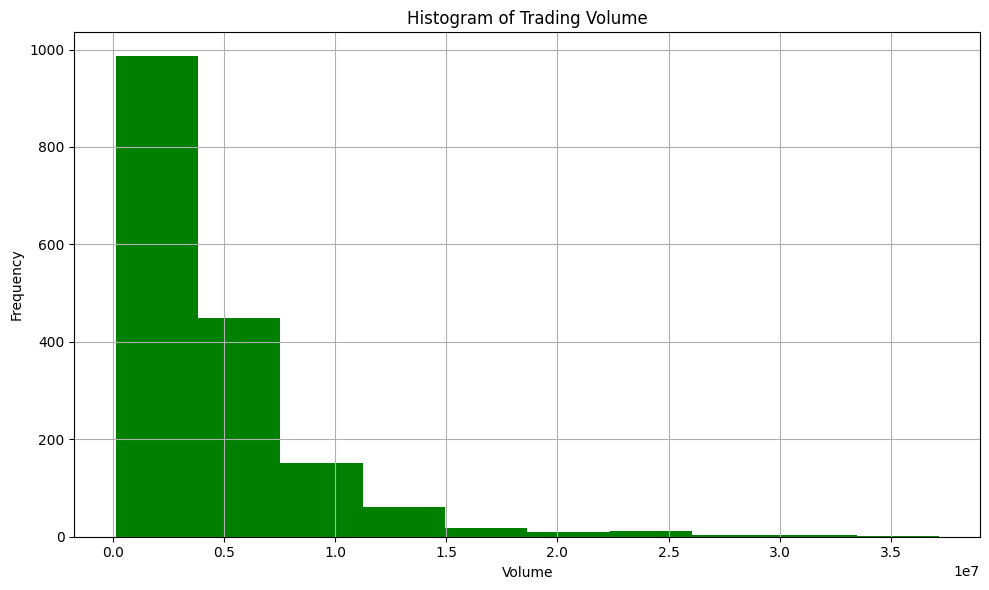

In [ ]:
plt.figure(figsize=(10, 6))
df['Volume'].hist(bins=10, color='green')
plt.title("Histogram of Trading Volume")
plt.xlabel("Volume")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

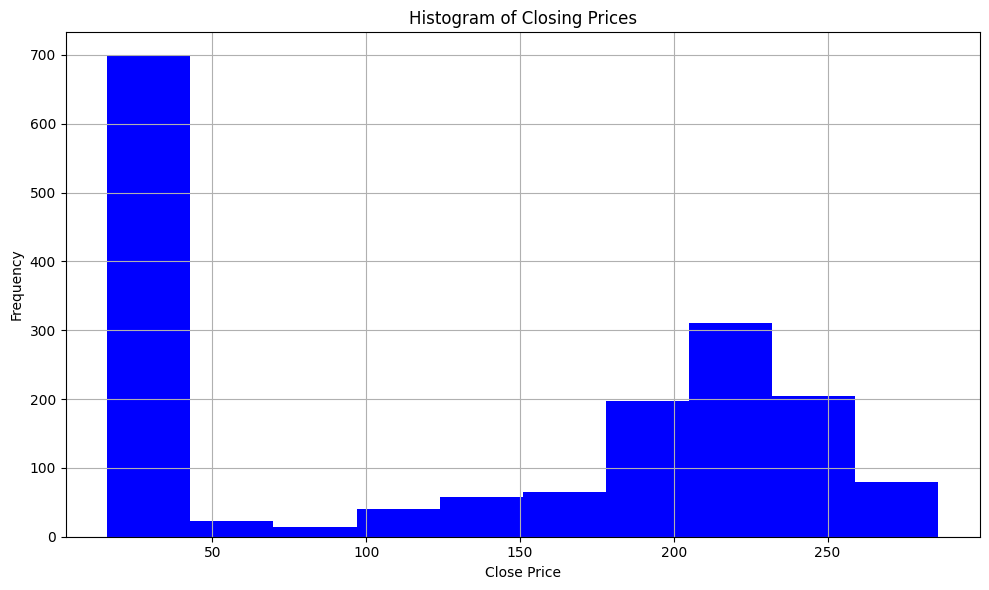

In [ ]:
plt.figure(figsize=(10, 6))
df['Close'].hist(bins=10, color='blue')
plt.title("Histogram of Closing Prices")
plt.xlabel("Close Price")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

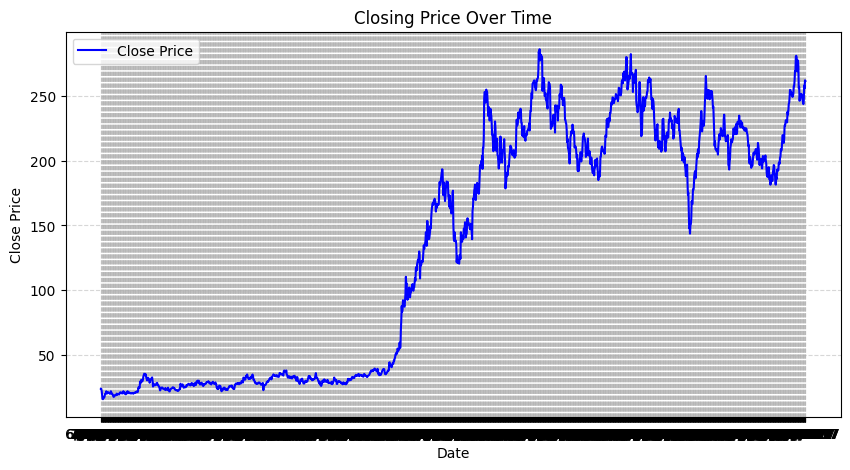

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')
plt.title('Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()


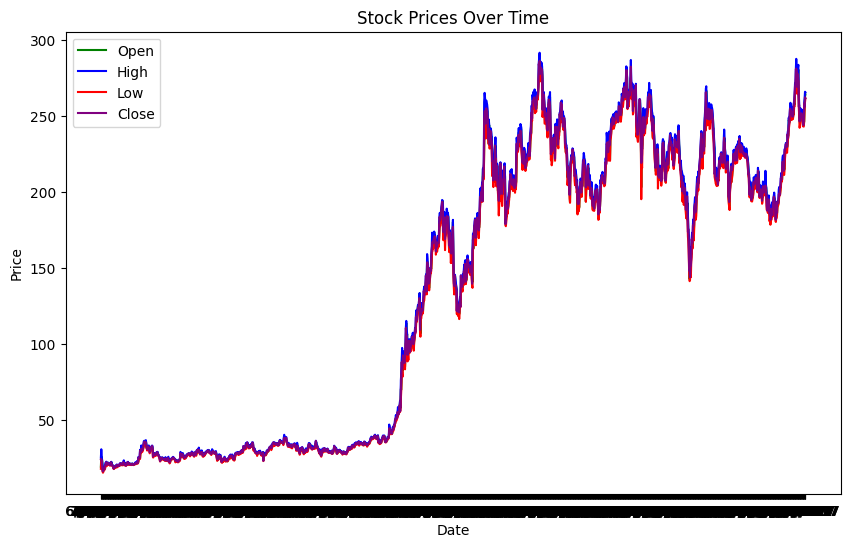

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Open'], label='Open', color='green')
plt.plot(df['Date'], df['High'], label='High', color='blue')
plt.plot(df['Date'], df['Low'], label='Low', color='red')
plt.plot(df['Date'], df['Close'], label='Close', color='purple')
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


Multivariate Analysis

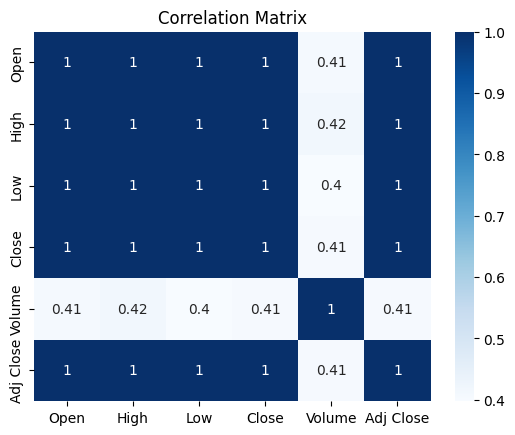

In [ ]:
import seaborn as sns

correlation_matrix = df[['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()


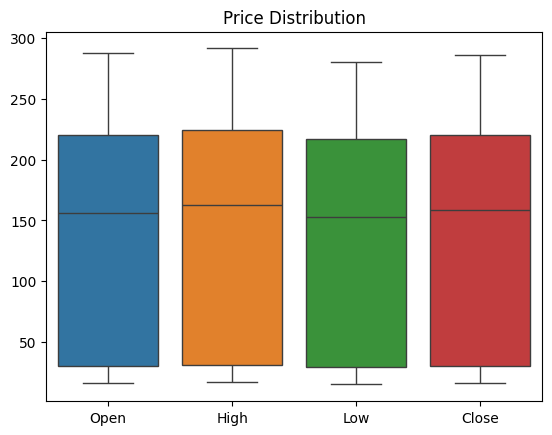

In [ ]:
sns.boxplot(data=df[['Open', 'High', 'Low', 'Close']])
plt.title('Price Distribution')
plt.show()

Bivariate Analysis

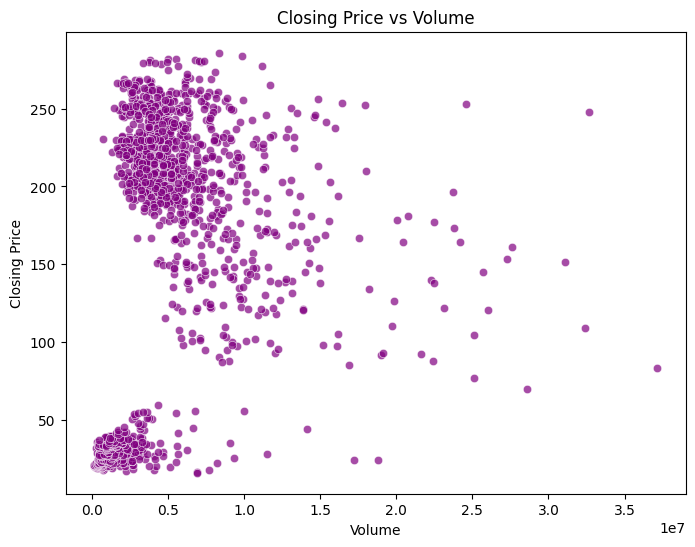

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Volume'], y=df['Close'], alpha=0.7, color='purple')
plt.title('Closing Price vs Volume')
plt.xlabel('Volume')
plt.ylabel('Closing Price')
plt.show()

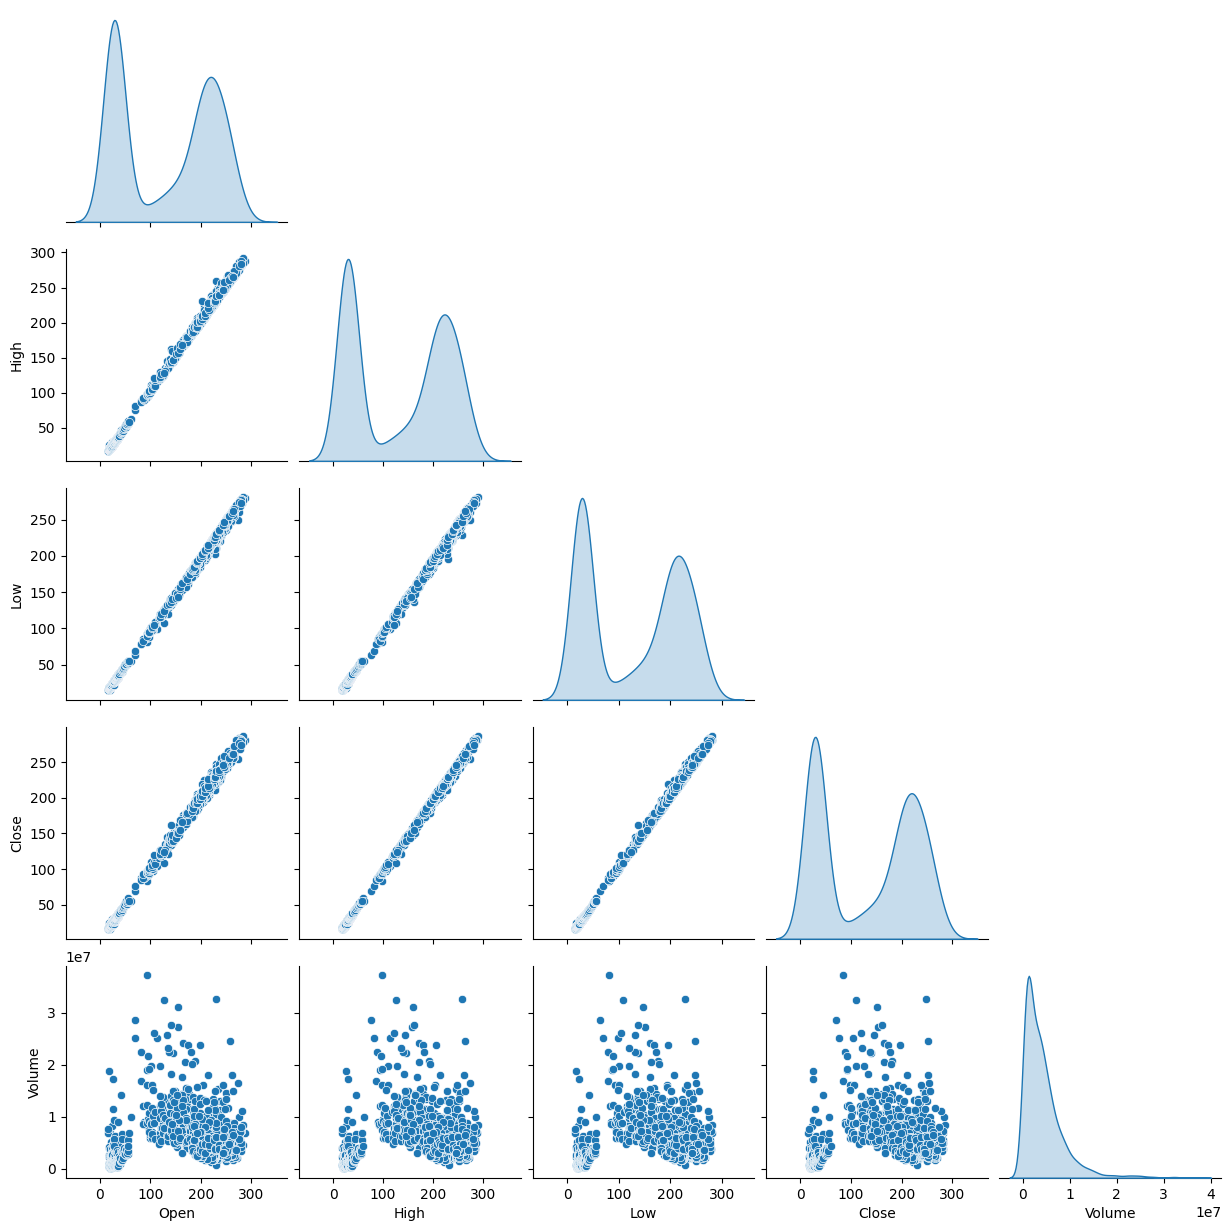

In [ ]:
sns.pairplot(df[['Open', 'High', 'Low', 'Close', 'Volume']], diag_kind='kde', corner=True)
plt.show()


**Detecting Outliers**

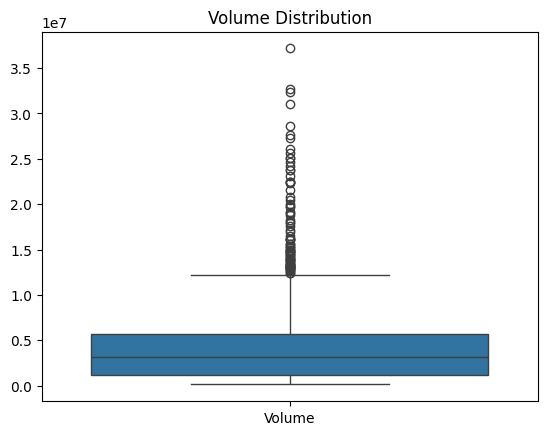

In [ ]:
sns.boxplot(data=df[['Volume']])
plt.title('Volume Distribution')
plt.show()

**Z_Score**

In [ ]:
import numpy as np
numeric_columns = df.select_dtypes(include=[np.number]).columns
z_scores = np.abs((df[numeric_columns] - df[numeric_columns].mean()) / df[numeric_columns].std())

outliers = (z_scores > 3).sum()+(z_scores < -3).sum()
print("\nOutliers per column:")
print(outliers)


Outliers per column:
Open          0
High          0
Low           0
Close         0
Volume       34
Adj Close     0
dtype: int64


**Skewness**

Open        -0.027382
High        -0.034205
Low         -0.021037
Close       -0.027977
Volume       2.538785
Adj Close   -0.027977
dtype: float64


<ipython-input-24-6dad9134b294>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=skewness.index, y=skewness.values,palette='viridis')


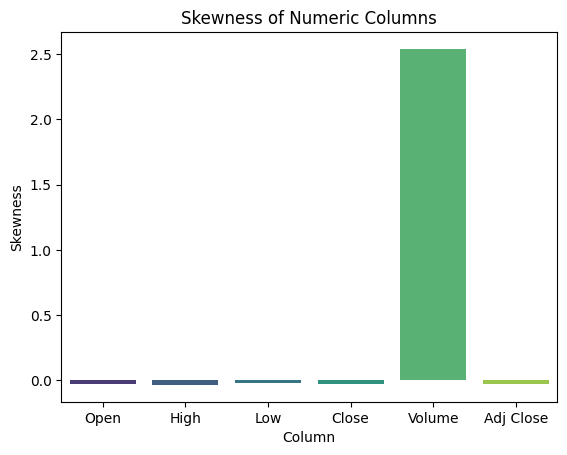

In [ ]:
from scipy.stats import skew
skewness = df[numeric_columns].apply(lambda x: skew(x.dropna()))
sns.barplot(x=skewness.index, y=skewness.values,palette='viridis')
print(skewness)
plt.title('Skewness of Numeric Columns')
plt.xlabel('Column')
plt.ylabel('Skewness')
plt.show()

**Kurtosis**

Open        -1.753629
High        -1.757042
Low         -1.750665
Close       -1.753760
Volume       9.749834
Adj Close   -1.753760
dtype: float64


<ipython-input-25-e136bed7fcd7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=kurtosis.index, y=kurtosis.values,palette='viridis')


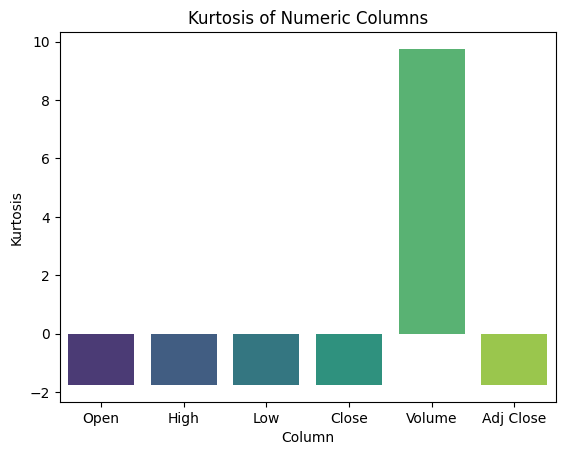

In [ ]:
from scipy.stats import kurtosis
kurtosis = df[numeric_columns].apply(lambda x: kurtosis(x.dropna()))
sns.barplot(x=kurtosis.index, y=kurtosis.values,palette='viridis')
print(kurtosis)
plt.title('Kurtosis of Numeric Columns')
plt.xlabel('Column')
plt.ylabel('Kurtosis')
plt.show()

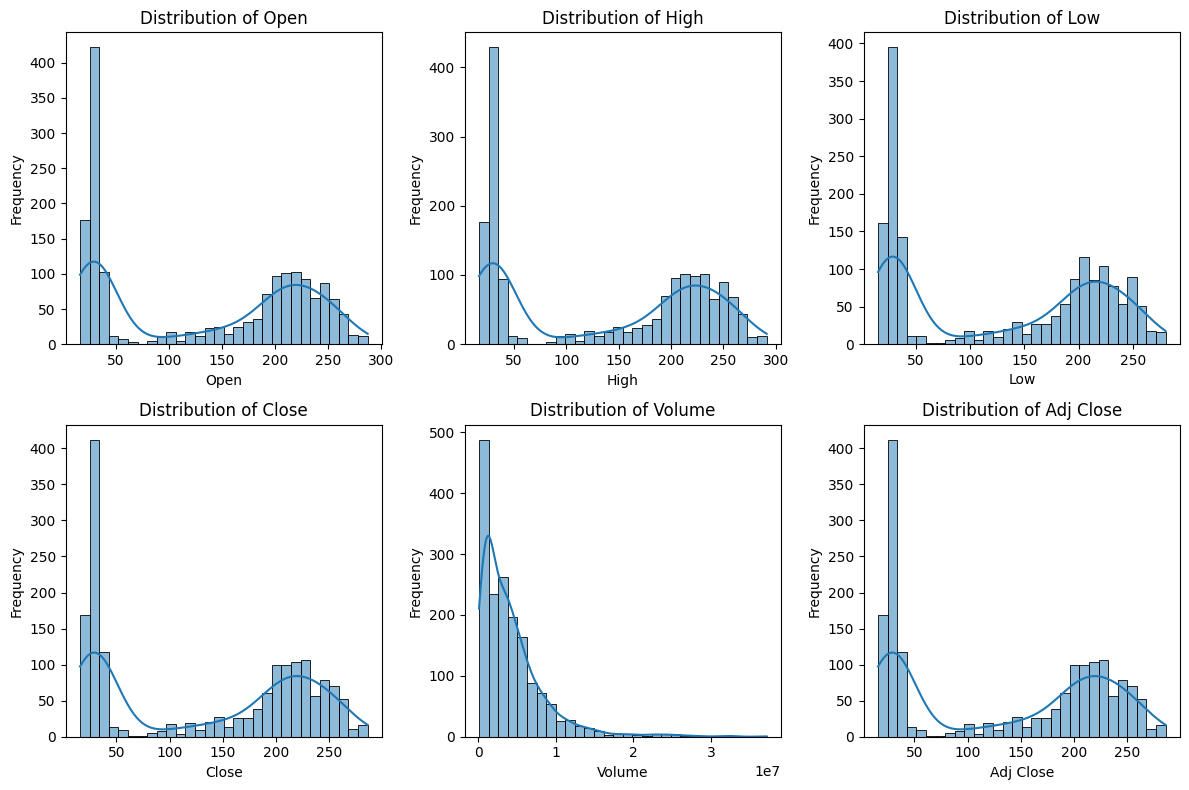

In [ ]:

plt.figure(figsize=(12, 8))


for i, col in enumerate(numeric_columns):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

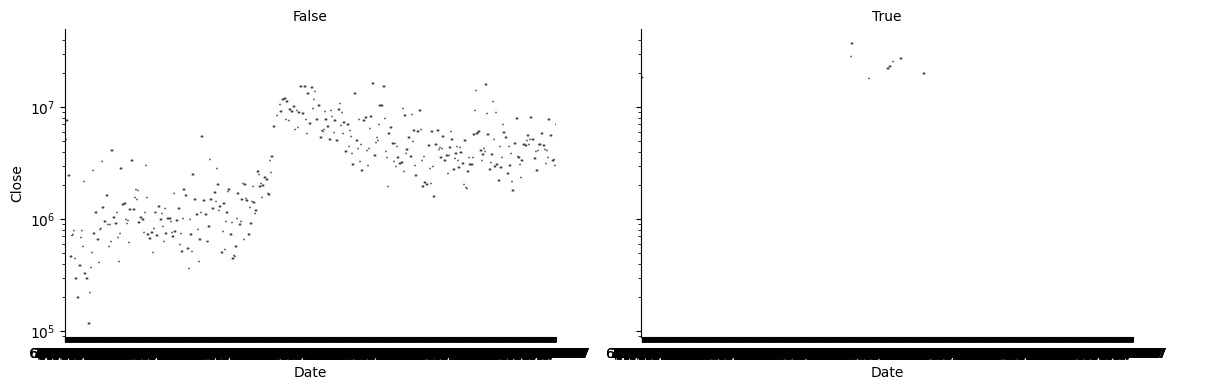

In [ ]:
df['is_outlier'] = (z_scores > 3).any(axis=1)
g = sns.catplot(
    data=df,
    x="Date",
    y="Volume",
    kind="box",
    col="is_outlier",
    col_wrap=2,
    height=4,
    aspect=1.5,
)
g.set_titles("{col_name}")
g.set_axis_labels("Date", "Close")
g.set(yscale="log")
g.tight_layout()
plt.show()

In [ ]:
tesla_data_outliers = df[(z_scores > 3).any(axis=1)]
print("\nRows with outliers:")
print(tesla_data_outliers.head())


Rows with outliers:
          Date       Open       High        Low      Close    Volume  \
0    6/29/2010  19.000000  25.000000  17.540001  23.889999  18766300   
1    6/30/2010  25.790001  30.420000  23.299999  23.830000  17187100   
720   5/9/2013  70.120003  75.769997  63.689999  69.400002  28605000   
721  5/10/2013  69.650002  81.000000  69.250000  76.760002  25082600   
722  5/13/2013  80.989998  88.000000  79.150002  87.800003  22416900   

     Adj Close  is_outlier  
0    23.889999        True  
1    23.830000        True  
720  69.400002        True  
721  76.760002        True  
722  87.800003        True  


In [ ]:

q1 = df['Volume'].quantile(0.25)
q3 = df['Volume'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers_lower = df[df['Volume'] <= lower_bound]
outliers_upper = df[df['Volume'] >= upper_bound]
outliers_count = outliers_lower.shape[0] + outliers_upper.shape[0]
outliers_count


80

**Feature Engineering**

Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()   ##Z-Score Standardization (x-mu/sigma)
df[['Open', 'Close','High','Low','Adj Close']] = scaler.fit_transform(df[['Open', 'Close','High','Low','Adj Close']])
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close,is_outlier
0,6/29/2010,-1.203215,-1.147419,-1.211450,-1.151173,18766300,-1.151173,True
1,6/30/2010,-1.131197,-1.090764,-1.149400,-1.151809,17187100,-1.151809,True
2,7/1/2010,-1.139576,-1.137802,-1.182041,-1.171642,8218800,-1.171642,False
3,7/2/2010,-1.160789,-1.167280,-1.198846,-1.200915,5139800,-1.200915,False
4,7/6/2010,-1.192608,-1.199684,-1.229871,-1.233688,6866900,-1.233688,False


In [ ]:
for col in df.columns:
    print(col,":", len(df[col].unique()),' labels')

Date : 1692  labels
Open : 1464  labels
High : 1470  labels
Low : 1468  labels
Close : 1528  labels
Volume : 1676  labels
Adj Close : 1528  labels
is_outlier : 2  labels


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()   #(X-Xmin/(Xmax-Xmin))
df[['Open', 'Close','High','Low','Adj Close']] = scaler.fit_transform(df[['Open', 'Close','High','Low','Adj Close']])
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close,is_outlier
0,6/29/2010,0.010533,0.030460,0.009645,0.029936,18766300,0.029936,True
1,6/30/2010,0.035539,0.050184,0.031347,0.029714,17187100,0.029714,True
2,7/1/2010,0.032630,0.033808,0.019931,0.022795,8218800,0.022795,False
3,7/2/2010,0.025264,0.023545,0.014053,0.012581,5139800,0.012581,False
4,7/6/2010,0.014216,0.012264,0.003202,0.001147,6866900,0.001147,False


Log Transformation

In [ ]:
log_df=df[numeric_columns].apply(lambda x: np.log(x.replace(0, np.nan)))
log_df

,Open,High,Low,Close,Volume,Adj Close
0,-4.553251,-3.491353,-4.641306,-3.508682,16.747573,-3.508682
1,-3.337115,-2.992063,-3.462651,-3.516126,16.659670,-3.516126
2,-3.422526,-3.387069,-3.915495,-3.781234,15.921935,-3.781234
3,-3.678365,-3.748831,-4.264905,-4.375535,15.452525,-4.375535
4,-4.253405,-4.401094,-5.743832,-6.770490,15.742223,-6.770490
...,...,...,...,...,...,...
1687,-0.171749,-0.176972,-0.152845,-0.159624,14.917683,-0.159624
1688,-0.166124,-0.129179,-0.138723,-0.109547,15.840430,-0.109547
1689,-0.119857,-0.117324,-0.103637,-0.118963,15.387579,-0.118963
1690,-0.097685,-0.098073,-0.083817,-0.092963,15.775662,-0.092963


**One-Hot Encoding**

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohc = OneHotEncoder()
df.High.value_counts().sort_index(ascending=False).head(20)

,count
High,
1.000000,1
0.987554,1
0.985334,1
0.982641,1
0.978420,1
0.976236,1
0.976200,1
0.975872,1
0.970996,1


In [ ]:
top_10_High = [x for x in df.High.value_counts().sort_index(ascending=False).head(10).index]
top_10_High

[1.0,
 0.9875540855716832,
 0.9853342632749384,
 0.9826412214528292,
 0.9784198016744524,
 0.9762364071934581,
 0.9761999793777077,
 0.9758724711153443,
 0.970996031173098,
 0.9689944373306084]

In [ ]:
for label in top_10_High:
    df['High_'+str(label)] = np.where(df['High']==label, 1, 0)
df[['High']+['High_'+str(label) for label in top_10_High]].head(15)

,High,High_1.0,High_0.9875540855716832,High_0.9853342632749384,High_0.9826412214528292,High_0.9784198016744524,High_0.9762364071934581,High_0.9761999793777077,High_0.9758724711153443,High_0.970996031173098,High_0.9689944373306084
0,0.030460,0,0,0,0,0,0,0,0,0,0
1,0.050184,0,0,0,0,0,0,0,0,0,0
2,0.033808,0,0,0,0,0,0,0,0,0,0
3,0.023545,0,0,0,0,0,0,0,0,0,0
4,0.012264,0,0,0,0,0,0,0,0,0,0
5,0.000000,0,0,0,0,0,0,0,0,0,0
6,0.003239,0,0,0,0,0,0,0,0,0,0
7,0.004622,0,0,0,0,0,0,0,0,0,0
8,0.005240,0,0,0,0,0,0,0,0,0,0
9,0.007315,0,0,0,0,0,0,0,0,0,0


In [ ]:
df['High_Bins'] = pd.cut(df['High'], bins=3, labels=['Low', 'Medium', 'High'])

In [ ]:
df['High_Bins'].value_counts()

,count
High_Bins,
Low,751
High,687
Medium,254


In [ ]:
df['Low_Bins'] = pd.cut(df['Low'], bins=3, labels=['Low', 'Medium', 'High'])
df['Low_Bins'].value_counts()

,count
Low_Bins,
Low,754
High,696
Medium,242


In [ ]:
df['Open_Bins'] = pd.cut(df['Open'], bins=3, labels=['Low', 'Medium', 'High'])
df['Open_Bins'].value_counts()

,count
Open_Bins,
Low,754
High,679
Medium,259


In [ ]:
df['Close_Bins'] = pd.cut(df['Close'], bins=3, labels=['Low', 'Medium', 'High'])
df['Close_Bins'].value_counts()

,count
Close_Bins,
Low,753
High,695
Medium,244


In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close,is_outlier,High_1.0,High_0.9875540855716832,...,High_0.9784198016744524,High_0.9762364071934581,High_0.9761999793777077,High_0.9758724711153443,High_0.970996031173098,High_0.9689944373306084,High_Bins,Low_Bins,Open_Bins,Close_Bins
0,6/29/2010,0.010533,0.030460,0.009645,0.029936,18766300,0.029936,True,0,0,...,0,0,0,0,0,0,Low,Low,Low,Low
1,6/30/2010,0.035539,0.050184,0.031347,0.029714,17187100,0.029714,True,0,0,...,0,0,0,0,0,0,Low,Low,Low,Low
2,7/1/2010,0.032630,0.033808,0.019931,0.022795,8218800,0.022795,False,0,0,...,0,0,0,0,0,0,Low,Low,Low,Low
3,7/2/2010,0.025264,0.023545,0.014053,0.012581,5139800,0.012581,False,0,0,...,0,0,0,0,0,0,Low,Low,Low,Low
4,7/6/2010,0.014216,0.012264,0.003202,0.001147,6866900,0.001147,False,0,0,...,0,0,0,0,0,0,Low,Low,Low,Low


**One Hot Encoding**

In [ ]:
new_data_encoded = pd.get_dummies(df,columns=['High_Bins','Low_Bins','Open_Bins','Close_Bins'])
new_data_encoded.head()

,Date,Open,High,Low,Close,Volume,Adj Close,is_outlier,High_1.0,High_0.9875540855716832,...,High_Bins_High,Low_Bins_Low,Low_Bins_Medium,Low_Bins_High,Open_Bins_Low,Open_Bins_Medium,Open_Bins_High,Close_Bins_Low,Close_Bins_Medium,Close_Bins_High
0,6/29/2010,0.010533,0.030460,0.009645,0.029936,18766300,0.029936,True,0,0,...,False,True,False,False,True,False,False,True,False,False
1,6/30/2010,0.035539,0.050184,0.031347,0.029714,17187100,0.029714,True,0,0,...,False,True,False,False,True,False,False,True,False,False
2,7/1/2010,0.032630,0.033808,0.019931,0.022795,8218800,0.022795,False,0,0,...,False,True,False,False,True,False,False,True,False,False
3,7/2/2010,0.025264,0.023545,0.014053,0.012581,5139800,0.012581,False,0,0,...,False,True,False,False,True,False,False,True,False,False
4,7/6/2010,0.014216,0.012264,0.003202,0.001147,6866900,0.001147,False,0,0,...,False,True,False,False,True,False,False,True,False,False


In [ ]:
new_data_encoded

,Date,Open,High,Low,Close,Volume,Adj Close,is_outlier,High_1.0,High_0.9875540855716832,...,High_Bins_High,Low_Bins_Low,Low_Bins_Medium,Low_Bins_High,Open_Bins_Low,Open_Bins_Medium,Open_Bins_High,Close_Bins_Low,Close_Bins_Medium,Close_Bins_High
0,6/29/2010,0.010533,0.030460,0.009645,0.029936,18766300,0.029936,True,0,0,...,False,True,False,False,True,False,False,True,False,False
1,6/30/2010,0.035539,0.050184,0.031347,0.029714,17187100,0.029714,True,0,0,...,False,True,False,False,True,False,False,True,False,False
2,7/1/2010,0.032630,0.033808,0.019931,0.022795,8218800,0.022795,False,0,0,...,False,True,False,False,True,False,False,True,False,False
3,7/2/2010,0.025264,0.023545,0.014053,0.012581,5139800,0.012581,False,0,0,...,False,True,False,False,True,False,False,True,False,False
4,7/6/2010,0.014216,0.012264,0.003202,0.001147,6866900,0.001147,False,0,0,...,False,True,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687,3/13/2017,0.842191,0.837803,0.858262,0.852464,3010700,0.852464,False,0,0,...,True,False,False,True,False,False,True,False,False,True
1688,3/14/2017,0.846941,0.878816,0.870469,0.896240,7575500,0.896240,False,0,0,...,True,False,False,True,False,False,True,False,False,True
1689,3/15/2017,0.887047,0.889297,0.901552,0.887840,4816600,0.887840,False,0,0,...,True,False,False,True,False,False,True,False,False,True
1690,3/16/2017,0.906935,0.906583,0.919599,0.911227,7100400,0.911227,False,0,0,...,True,False,False,True,False,False,True,False,False,True


**Label Encoding**

In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv('/content/tesla.csv',usecols=['Date','Open','Close','High','Low','Volume'])
data.head()

,Date,Open,High,Low,Close,Volume
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900


In [ ]:
from sklearn.preprocessing import LabelEncoder
df = data
df['Open_label']=LabelEncoder().fit_transform(df.Open)
df

,Date,Open,High,Low,Close,Volume,Open_label
0,6/29/2010,19.000000,25.000000,17.540001,23.889999,18766300,13
1,6/30/2010,25.790001,30.420000,23.299999,23.830000,17187100,156
2,7/1/2010,25.000000,25.920000,20.270000,21.959999,8218800,142
3,7/2/2010,23.000000,23.100000,18.709999,19.200001,5139800,89
4,7/6/2010,20.000000,20.000000,15.830000,16.110001,6866900,27
...,...,...,...,...,...,...,...
1687,3/13/2017,244.820007,246.850006,242.779999,246.169998,3010700,1275
1688,3/14/2017,246.110001,258.119995,246.020004,258.000000,7575500,1287
1689,3/15/2017,257.000000,261.000000,254.270004,255.729996,4816600,1380
1690,3/16/2017,262.399994,265.750000,259.059998,262.049988,7100400,1413


**Principal Component Analysis**

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
scaler = StandardScaler()
numeric_features = ['Open', 'High', 'Low', 'Close', 'Volume']
df[numeric_features] = scaler.fit_transform(df[numeric_features])

In [ ]:
pca = PCA(n_components=2)
pca_features = pca.fit_transform(df[numeric_features])
df['PCA1'] = pca_features[:, 0]
df['PCA2'] = pca_features[:, 1]
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print(pca_features)

Explained Variance Ratio: [0.84110034 0.15867531]
[[-1.45306924  3.85175574]
 [-1.45148336  3.47197552]
 [-2.01790074  1.46143048]
 ...
 [ 2.59346423 -0.52784221]
 [ 2.83369301 -0.04029671]
 [ 2.81231911 -0.18518976]]


In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume,Open_label,PCA1,PCA2
0,6/29/2010,-1.203215,-1.147419,-1.211450,-1.151173,3.375219,13,-1.453069,3.851756
1,6/30/2010,-1.131197,-1.090764,-1.149400,-1.151809,3.007510,156,-1.451483,3.471976
2,7/1/2010,-1.139576,-1.137802,-1.182041,-1.171642,0.919286,142,-2.017901,1.461430
3,7/2/2010,-1.160789,-1.167280,-1.198846,-1.200915,0.202356,89,-2.241312,0.778431
4,7/6/2010,-1.192608,-1.199684,-1.229871,-1.233688,0.604503,27,-2.204344,1.183889


In [ ]:
df['Close-Open'] = df['Close'] - df['Open']
df['High-Low'] = df['High'] - df['Low']

In [ ]:
df['Trend'] = ['Uptrend' if df['Close'].iloc[i] > df['Close'].iloc[i - 1] else 'Downtrend'
               for i in range(len(df))]
df['Trend'].iloc[0] = 'Neutral'
df['Trend_Label'] = df['Trend'].map({'Uptrend': 1, 'Downtrend': 0, 'Neutral': 0})
df.head()


<ipython-input-52-775c9cc68a7a>:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Trend'].iloc[0] = 'Neutral'
<ipython-input-52-775c9cc68a7a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

,Date,Open,High,Low,Close,Volume,Open_label,PCA1,PCA2,Close-Open,High-Low,Trend,Trend_Label
0,6/29/2010,-1.203215,-1.147419,-1.211450,-1.151173,3.375219,13,-1.453069,3.851756,0.052042,0.064031,Neutral,NaN
1,6/30/2010,-1.131197,-1.090764,-1.149400,-1.151809,3.007510,156,-1.451483,3.471976,-0.020612,0.058636,Downtrend,0.0
2,7/1/2010,-1.139576,-1.137802,-1.182041,-1.171642,0.919286,142,-2.017901,1.461430,-0.032066,0.044239,Downtrend,0.0
3,7/2/2010,-1.160789,-1.167280,-1.198846,-1.200915,0.202356,89,-2.241312,0.778431,-0.040126,0.031567,Downtrend,0.0
4,7/6/2010,-1.192608,-1.199684,-1.229871,-1.233688,0.604503,27,-2.204344,1.183889,-0.041080,0.030188,Downtrend,0.0


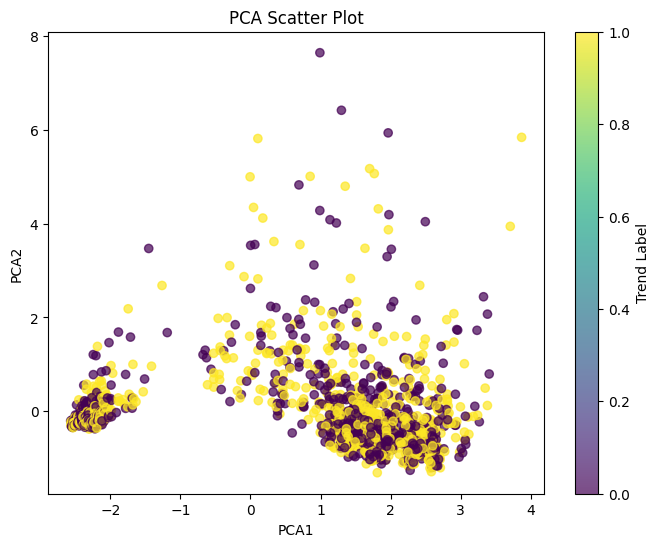

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['PCA1'], df['PCA2'], c=df['Trend_Label'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Trend Label')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('PCA Scatter Plot')
plt.show()

In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume,Open_label,PCA1,PCA2,Close-Open,High-Low,Trend,Trend_Label
0,6/29/2010,-1.203215,-1.147419,-1.211450,-1.151173,3.375219,13,-1.453069,3.851756,0.052042,0.064031,Neutral,NaN
1,6/30/2010,-1.131197,-1.090764,-1.149400,-1.151809,3.007510,156,-1.451483,3.471976,-0.020612,0.058636,Downtrend,0.0
2,7/1/2010,-1.139576,-1.137802,-1.182041,-1.171642,0.919286,142,-2.017901,1.461430,-0.032066,0.044239,Downtrend,0.0
3,7/2/2010,-1.160789,-1.167280,-1.198846,-1.200915,0.202356,89,-2.241312,0.778431,-0.040126,0.031567,Downtrend,0.0
4,7/6/2010,-1.192608,-1.199684,-1.229871,-1.233688,0.604503,27,-2.204344,1.183889,-0.041080,0.030188,Downtrend,0.0


Logistic Regression

# Logistic Regression

In [ ]:
df = df.drop(columns=['Date'])
df = df.dropna()

In [ ]:
label_encoder = LabelEncoder()
df['Trend'] = label_encoder.fit_transform(df['Trend'])

In [ ]:
label_encoder = LabelEncoder()
df['Trend_Label'] = label_encoder.fit_transform(df['Trend_Label'])

In [ ]:
df.head()

,Open,High,Low,Close,Volume,Open_label,PCA1,PCA2,Close-Open,High-Low,Trend,Trend_Label
1,-1.131197,-1.090764,-1.149400,-1.151809,3.007510,156,-1.451483,3.471976,-0.020612,0.058636,0,0
2,-1.139576,-1.137802,-1.182041,-1.171642,0.919286,142,-2.017901,1.461430,-0.032066,0.044239,0,0
3,-1.160789,-1.167280,-1.198846,-1.200915,0.202356,89,-2.241312,0.778431,-0.040126,0.031567,0,0
4,-1.192608,-1.199684,-1.229871,-1.233688,0.604503,27,-2.204344,1.183889,-0.041080,0.030188,0,0
5,-1.230792,-1.234910,-1.239028,-1.236976,0.617263,1,-2.242823,1.206509,-0.006184,0.004118,0,0


In [ ]:
df.head()

,Open,High,Low,Close,Volume,Open_label,PCA1,PCA2,Close-Open,High-Low,Trend,Trend_Label
1,-1.131197,-1.090764,-1.149400,-1.151809,3.007510,156,-1.451483,3.471976,-0.020612,0.058636,0,0
2,-1.139576,-1.137802,-1.182041,-1.171642,0.919286,142,-2.017901,1.461430,-0.032066,0.044239,0,0
3,-1.160789,-1.167280,-1.198846,-1.200915,0.202356,89,-2.241312,0.778431,-0.040126,0.031567,0,0
4,-1.192608,-1.199684,-1.229871,-1.233688,0.604503,27,-2.204344,1.183889,-0.041080,0.030188,0,0
5,-1.230792,-1.234910,-1.239028,-1.236976,0.617263,1,-2.242823,1.206509,-0.006184,0.004118,0,0


Separating training and testing data

In [ ]:
train_size = int(0.8 * len(df))  #Splitting
train_data = df[:train_size]
test_data = df[train_size:]

In [ ]:
X = train_data[['Open','Close','Volume','High','Low','Close-Open','High-Low']]
y = train_data['Trend_Label']

In [ ]:
x_test = test_data[['Open','Close','Volume','High','Low','Close-Open','High-Low']]
y_test = test_data['Trend_Label']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=2022)


Without hyperparameters


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.69      0.77       141
           1       0.73      0.90      0.80       130

    accuracy                           0.79       271
   macro avg       0.80      0.79      0.79       271
weighted avg       0.81      0.79      0.79       271

Logistic Regression Confusion Matrix:
[[ 97  44]
 [ 13 117]]


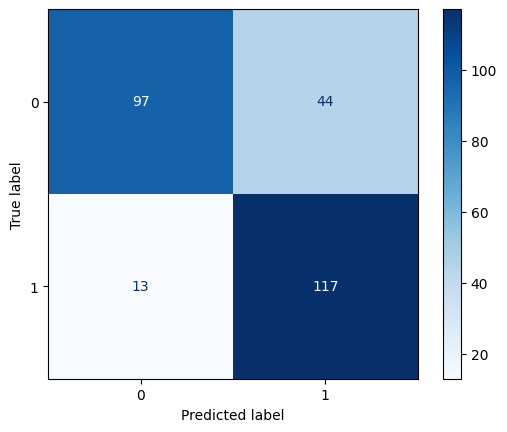

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_predictions = logreg.predict(X_valid)

print("Logistic Regression Classification Report:")
print(classification_report(y_valid, logreg_predictions))

cm_logreg = confusion_matrix(y_valid, logreg_predictions)
disp_logreg = ConfusionMatrixDisplay(confusion_matrix=cm_logreg, display_labels=logreg.classes_)
disp_logreg.plot(cmap='Blues')
print("Logistic Regression Confusion Matrix:")
print(cm_logreg)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

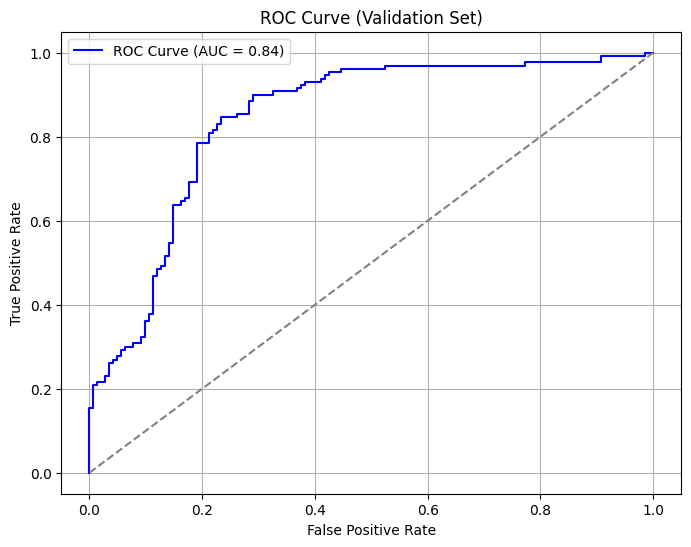

In [ ]:
y_valid_prob = logreg.predict_proba(X_valid)[:, 1]
roc_auc = roc_auc_score(y_valid, y_valid_prob)
fpr, tpr, thresholds = roc_curve(y_valid, y_valid_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Validation Set)')
plt.legend()
plt.grid()
plt.show()

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.67      0.76       165
           1       0.74      0.90      0.82       174

    accuracy                           0.79       339
   macro avg       0.81      0.79      0.79       339
weighted avg       0.80      0.79      0.79       339

Logistic Regression Confusion Matrix:
[[111  54]
 [ 17 157]]


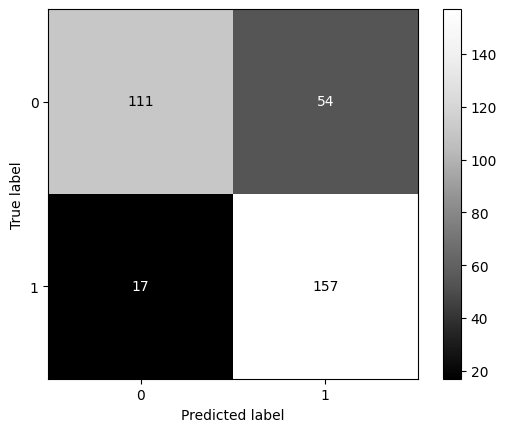

In [ ]:
##Testing part
logreg_predictions = logreg.predict(x_test)

print("Logistic Regression Classification Report:")
print(classification_report(y_test, logreg_predictions))

cm_logreg = confusion_matrix(y_test, logreg_predictions)
disp_logreg = ConfusionMatrixDisplay(confusion_matrix=cm_logreg, display_labels=logreg.classes_)
disp_logreg.plot(cmap='Greys_r')
print("Logistic Regression Confusion Matrix:")
print(cm_logreg)

With hyperparameters

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'max_iter': [100, 200, 500,1000],
}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train,y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Best Parameters:", grid_search.best_params_)
print(classification_report(y_test, y_pred))


Best Parameters: {'C': 100, 'max_iter': 100, 'penalty': 'l2'}
              precision    recall  f1-score   support

           0       0.86      0.83      0.85       199
           1       0.85      0.87      0.86       207

    accuracy                           0.85       406
   macro avg       0.85      0.85      0.85       406
weighted avg       0.85      0.85      0.85       406



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.86      0.80       141
           1       0.82      0.69      0.75       130

    accuracy                           0.78       271
   macro avg       0.78      0.78      0.78       271
weighted avg       0.78      0.78      0.78       271

Logistic Regression Confusion Matrix:
[[121  20]
 [ 40  90]]


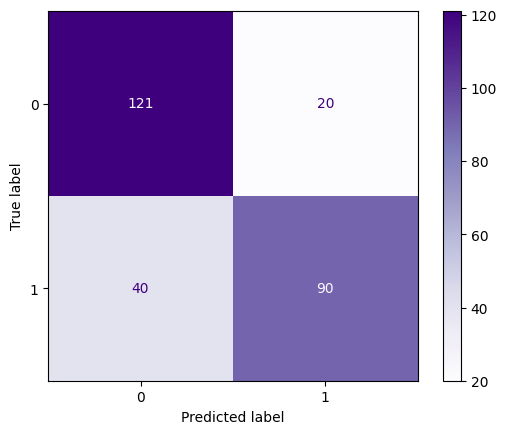

In [ ]:
logreg = LogisticRegression(max_iter=1000,penalty='l2',random_state=2022,class_weight='balanced')
logreg.fit(X_train, y_train)
logreg_predictions = logreg.predict(X_valid)

print("Logistic Regression Classification Report:")
print(classification_report(y_valid, logreg_predictions))

cm_logreg = confusion_matrix(y_valid, logreg_predictions)
disp_logreg = ConfusionMatrixDisplay(confusion_matrix=cm_logreg, display_labels=logreg.classes_)
disp_logreg.plot(cmap='Purples')
print("Logistic Regression Confusion Matrix:")
print(cm_logreg)

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       199
           1       0.87      0.74      0.80       207

    accuracy                           0.81       406
   macro avg       0.82      0.81      0.81       406
weighted avg       0.82      0.81      0.81       406

Logistic Regression Confusion Matrix:
[[176  23]
 [ 54 153]]


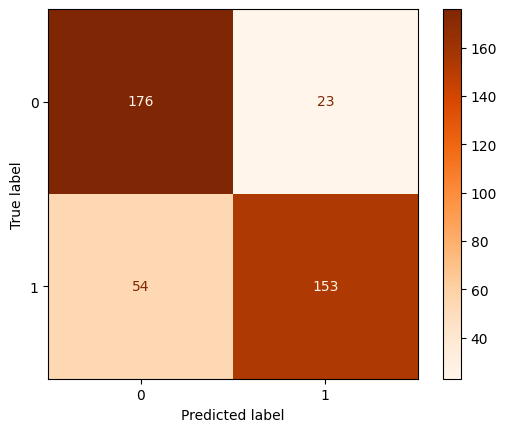

In [ ]:
##Testing part
logreg_predictions = logreg.predict(X_test)

print("Logistic Regression Classification Report:")
print(classification_report(y_test, logreg_predictions))

cm_logreg = confusion_matrix(y_test, logreg_predictions)
disp_logreg = ConfusionMatrixDisplay(confusion_matrix=cm_logreg, display_labels=logreg.classes_)
disp_logreg.plot(cmap='Oranges')
print("Logistic Regression Confusion Matrix:")
print(cm_logreg)

Using Best Hyperparameters


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.79      0.82       141
           1       0.79      0.85      0.81       130

    accuracy                           0.82       271
   macro avg       0.82      0.82      0.82       271
weighted avg       0.82      0.82      0.82       271

Logistic Regression Confusion Matrix:
[[111  30]
 [ 20 110]]


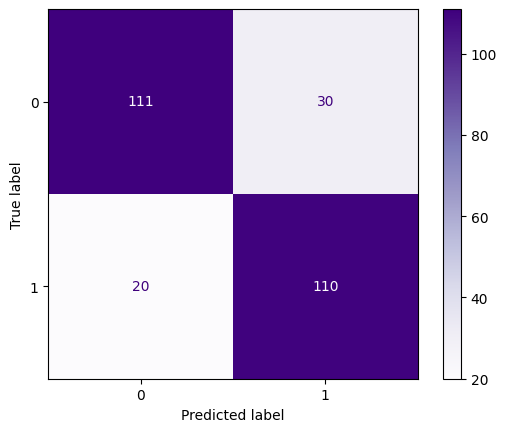

In [ ]:
logreg = LogisticRegression(max_iter=100,penalty='l2',C=100)
logreg.fit(X_train, y_train)
logreg_predictions = logreg.predict(X_valid)

print("Logistic Regression Classification Report:")
print(classification_report(y_valid, logreg_predictions))

cm_logreg = confusion_matrix(y_valid, logreg_predictions)
disp_logreg = ConfusionMatrixDisplay(confusion_matrix=cm_logreg, display_labels=logreg.classes_)
disp_logreg.plot(cmap='Purples')
print("Logistic Regression Confusion Matrix:")
print(cm_logreg)

Testing accuracy for hyperparameter used model

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.83      0.85       199
           1       0.85      0.87      0.86       207

    accuracy                           0.85       406
   macro avg       0.85      0.85      0.85       406
weighted avg       0.85      0.85      0.85       406

Logistic Regression Confusion Matrix:
[[166  33]
 [ 27 180]]


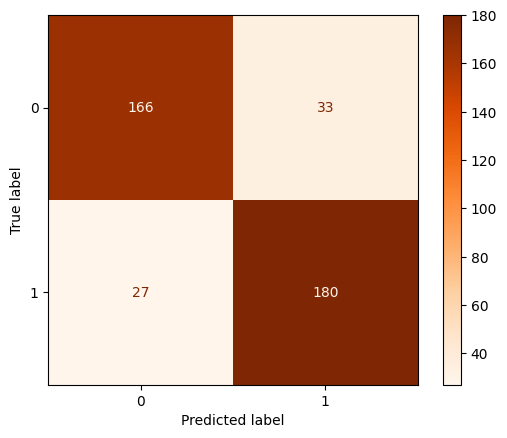

In [ ]:
##Testing part
logreg_predictions = logreg.predict(X_test)

print("Logistic Regression Classification Report:")
print(classification_report(y_test, logreg_predictions))

cm_logreg = confusion_matrix(y_test, logreg_predictions)
disp_logreg = ConfusionMatrixDisplay(confusion_matrix=cm_logreg, display_labels=logreg.classes_)
disp_logreg.plot(cmap='Oranges')
print("Logistic Regression Confusion Matrix:")
print(cm_logreg)

# **Support Vector Machine (SVM)**

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm = SVC(kernel='poly',probability=True)
svm.fit(X_train, y_train)
svm_predictions = svm.predict(X_valid)

In [ ]:
print("SVM Classification Report:")
print(classification_report(y_valid, svm_predictions))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.13      0.23       141
           1       0.51      0.97      0.67       130

    accuracy                           0.54       271
   macro avg       0.67      0.55      0.45       271
weighted avg       0.67      0.54      0.44       271



SVM Confusion Matrix:
[[ 19 122]
 [  4 126]]


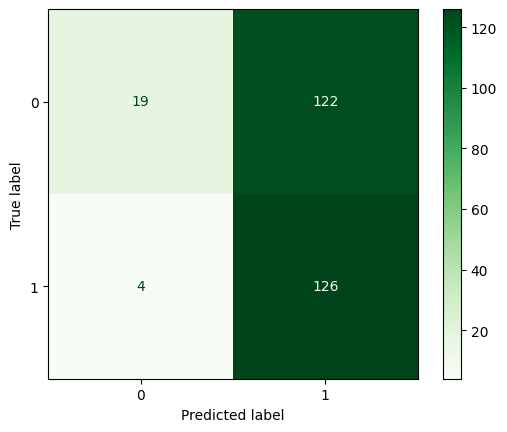

In [ ]:
cm_svm = confusion_matrix(y_valid, svm_predictions)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=svm.classes_)
disp_svm.plot(cmap='Greens')
print("SVM Confusion Matrix:")
print(cm_svm)


In [ ]:
svm = SVC(kernel='linear',probability=True)
svm.fit(X_train, y_train)
svm_predictions = svm.predict(X_valid)

In [ ]:
print("SVM Classification Report:")
print(classification_report(y_valid, svm_predictions))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.34      0.48       141
           1       0.56      0.92      0.70       130

    accuracy                           0.62       271
   macro avg       0.70      0.63      0.59       271
weighted avg       0.70      0.62      0.59       271



SVM Confusion Matrix:
[[ 48  93]
 [ 10 120]]


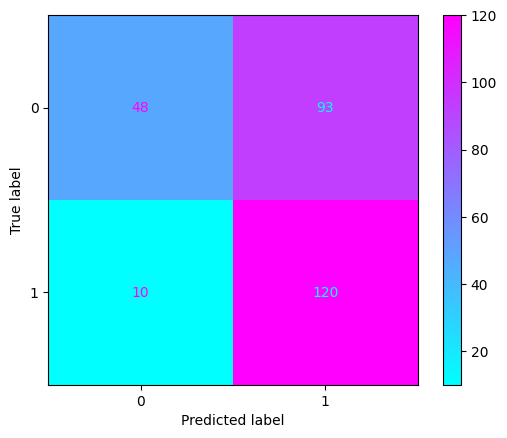

In [ ]:
cm_svm = confusion_matrix(y_valid, svm_predictions)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=svm.classes_)
disp_svm.plot(cmap='cool')
print("SVM Confusion Matrix:")
print(cm_svm)


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.34      0.49       199
           1       0.60      0.96      0.74       207

    accuracy                           0.65       406
   macro avg       0.74      0.65      0.61       406
weighted avg       0.74      0.65      0.61       406

SVM Confusion Matrix:
[[ 67 132]
 [  9 198]]


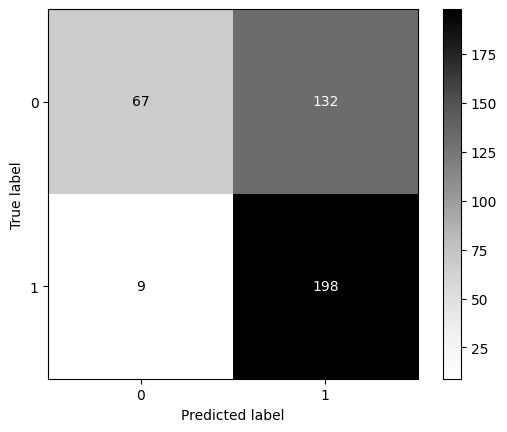

In [ ]:

svm_predictions = svm.predict(X_test)
print("SVM Classification Report:")
print(classification_report(y_test, svm_predictions))
cm_svm = confusion_matrix(y_test, svm_predictions)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=svm.classes_)
disp_svm.plot(cmap='Greys')
print("SVM Confusion Matrix:")
print(cm_svm)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Cross Validation

In [ ]:
param_grid = [
    {
        'kernel': ['linear'],
        'C': [0.01, 0.1, 1, 10, 100]
    },
    {
        'kernel': ['poly'],
        'C': [0.01, 0.1, 1, 10, 100],
        'degree': [2, 3, 4],
        'gamma': ['scale', 'auto', 0.001, 0.01],
        'coef0': [0.0, 0.5, 1.0]
    },
    {
        'kernel': ['rbf'],
        'C': [0.01, 0.1, 1, 10, 100],
        'gamma': ['scale', 'auto', 0.001, 0.01]
    }
]

svm = SVC(probability=True)
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_


In [ ]:
best_model.predict(X_test)
print("Best Parameters from Grid Search:", grid_search.best_params_)

Best Parameters from Grid Search: {'C': 100, 'coef0': 1.0, 'degree': 4, 'gamma': 'auto', 'kernel': 'poly'}


In [ ]:
svm = SVC(kernel='poly',C=100,coef0=1.0,degree=4,gamma='scale',probability=True)
svm.fit(X_train, y_train)
svm_predictions = svm.predict(X_test)

In [ ]:
print("SVM Classification Report:")
print(classification_report(y_test, svm_predictions))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       199
           1       0.85      0.84      0.84       207

    accuracy                           0.84       406
   macro avg       0.84      0.84      0.84       406
weighted avg       0.84      0.84      0.84       406



SVM Confusion Matrix:
[[168  31]
 [ 33 174]]


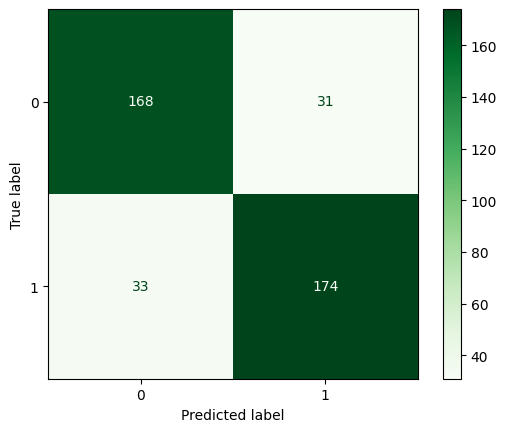

In [ ]:
cm_svm = confusion_matrix(y_test, svm_predictions)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=svm.classes_)
disp_svm.plot(cmap='Greens')
print("SVM Confusion Matrix:")
print(cm_svm)

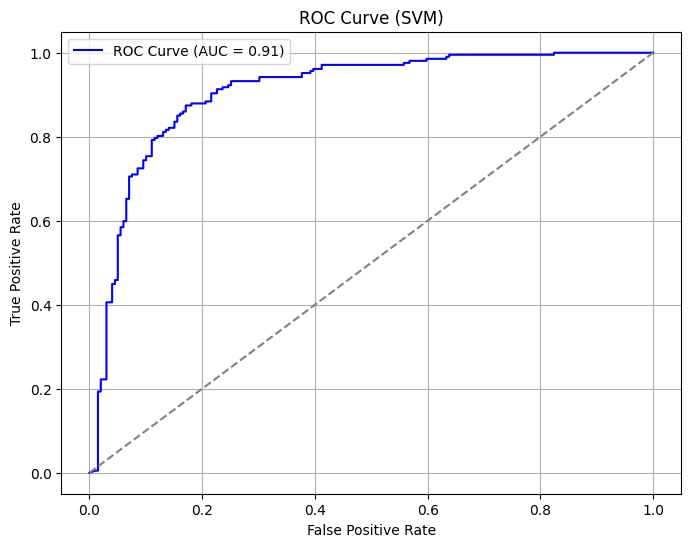

In [ ]:
y_test_prob = svm.predict_proba(X_test)[:, 1]  #
roc_auc = roc_auc_score(y_test, y_test_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (SVM)')
plt.legend()
plt.grid()
plt.show()

**XGBoost Model**

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from xgboost import plot_importance
import xgboost as xgb


# Define data_dmatrix
data_dmatrix = xgb.DMatrix(data=X, label=y)

# Split into training and testing sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# split X and y into training and testing sets
print("\nData Split:")
print(f"Training Data: {X_train.shape}")
print(f"Validation Data: {X_valid.shape}")



Data Split:
Training Data: (1081, 7)
Validation Data: (271, 7)


In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)


Cross-Validation and Model Optimization

With Hyperparameters

In [ ]:
print("\nData Split Complete!")
print(f"Training Data Shape: {X_train.shape}")
print(f"Validation Data Shape: {X_valid.shape}")

# Convert the dataset into DMatrix (XGBoost's internal data structure)
dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_valid, label=y_valid)

# Define parameter grid for XGBoost
param = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'max_depth': 5,
    'learning_rate': 0.1,
    # 'n_estimators': 100,
    'subsample': 0.8,
    'colsample_bytree': 0.8
}

# Perform cross-validation using XGBoost's cv method
cv_results = xgb.cv(
    param,
    dtrain,
    num_boost_round=1000,
    nfold=3,
    metrics={'logloss'},
    early_stopping_rounds=10,
    seed=42
)

# Get the best number of boosting rounds
best_num_rounds = cv_results['test-logloss-mean'].idxmin()
print(f"\nBest Number of Boosting Rounds: {best_num_rounds}")

# Train the model using the best number of boosting rounds
model = xgb.train(
    param,
    dtrain,
    num_boost_round=best_num_rounds
)

# Make predictions on the validation set
y_pred_proba = model.predict(dvalid)
y_pred = (y_pred_proba > 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_valid, y_pred)
print(f"\nAccuracy (with XGBoost cv tuning): {accuracy:.2f}")







Data Split Complete!
Training Data Shape: (1081, 7)
Validation Data Shape: (271, 7)

Best Number of Boosting Rounds: 41

Accuracy (with XGBoost cv tuning): 0.84


Without hyperparameters

In [ ]:
# Train the model with default parameters (no hyperparameters specified)
model = xgb.train({}, dtrain, num_boost_round=100)

# Make predictions on the validation set
y_pred_proba = model.predict(dvalid)
y_pred = (y_pred_proba > 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_valid, y_pred)
print(f"\nAccuracy (without hyperparameter tuning): {accuracy:.2f}")



Accuracy (without hyperparameter tuning): 0.80


GridSearchCV for hyperparameter tuning and Evaluation of XGBoost Classifier

In [ ]:
from sklearn.base import BaseEstimator
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score


# Custom wrapper class for XGBClassifier
class XGBClassifierWrapper(BaseEstimator):
    def __init__(self, **params):
        # Pass all received parameters to the XGBClassifier
        self.model = xgb.XGBClassifier(**params)

    def fit(self, X, y):
        self.model.fit(X, y)
        return self

    def predict(self, X):
        return self.model.predict(X)

    def set_params(self, **params):
        # Ensure that parameters are correctly passed to the XGBClassifier
        self.model.set_params(**params)
        return self



# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize the custom wrapper model
xgb_clf_wrapper = XGBClassifierWrapper()

# Create a GridSearchCV object for hyperparameter tuning
grid_search = GridSearchCV(estimator=xgb_clf_wrapper, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit the model on the training data using GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and estimator from GridSearchCV
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Predict and evaluate on training data
train_pred = best_model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_pred)

# Predict and evaluate on testing data
test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_pred)

# Print results
print(f"Best Parameters: {best_params}")
print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 150, 'subsample': 0.8}
Training Accuracy: 0.9250693802035153
Testing Accuracy: 0.8571428571428571


**Advanced Feature Engineering**

Rare category handling

In [ ]:
import pandas as pd

#Load the dataset
df=pd.read_csv('tesla.csv')

# Display dataset structure
print("Dataset Columns:", df.columns)
print("\nSample Data:\n", df.head())

# Handle rare categories
def handle_rare_categories(df, categorical_cols, threshold=0.05):
    for col in categorical_cols:
        # Get category counts
        category_counts = df[col].value_counts(normalize=True)
        rare_categories = category_counts[category_counts < threshold].index

        # Merge rare categories into "Other"
        df[col] = df[col].apply(lambda x: 'Other' if x in rare_categories else x)
    return df

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Apply rare category handling
df = handle_rare_categories(df, categorical_cols)

# Check for null values and handle them (if any)
if df.isnull().sum().any():
    print("\nHandling missing values...")
    df = df.fillna("Unknown")  # Fill missing values in categorical columns

# Display the data after handling rare categories
print("\nData after handling rare categories:\n", df.head())


Dataset Columns: Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], dtype='object')

Sample Data:
         Date       Open   High        Low      Close    Volume  Adj Close
0  6/29/2010  19.000000  25.00  17.540001  23.889999  18766300  23.889999
1  6/30/2010  25.790001  30.42  23.299999  23.830000  17187100  23.830000
2   7/1/2010  25.000000  25.92  20.270000  21.959999   8218800  21.959999
3   7/2/2010  23.000000  23.10  18.709999  19.200001   5139800  19.200001
4   7/6/2010  20.000000  20.00  15.830000  16.110001   6866900  16.110001

Data after handling rare categories:
     Date       Open   High        Low      Close    Volume  Adj Close
0  Other  19.000000  25.00  17.540001  23.889999  18766300  23.889999
1  Other  25.790001  30.42  23.299999  23.830000  17187100  23.830000
2  Other  25.000000  25.92  20.270000  21.959999   8218800  21.959999
3  Other  23.000000  23.10  18.709999  19.200001   5139800  19.200001
4  Other  20.000000  20.00  15.830000  16.110001

SelectKBest for Chi-Square Test

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Initialize an empty dictionary to store label encoders for each categorical column
label_encoders = {}

# Iterate over all categorical columns to encode them into numeric values
for col in categorical_cols:
    le = LabelEncoder()  # Create a LabelEncoder instance
    df[col] = le.fit_transform(df[col].astype(str))  # Encode the column and update the DataFrame
    label_encoders[col] = le  # Save the encoder for potential inverse transformation later

# Define the target column for the Chi-Square test
target_col = 'Close'

# Check if the target column exists in the DataFrame; raise an error if it doesn't
if target_col not in df.columns:
    raise ValueError(f"Target column '{target_col}' not found in dataset columns!")

# Identify all numeric columns in the DataFrame, excluding the target column
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_cols = [col for col in numeric_cols if col != target_col]  # Remove the target column from numeric columns

# Check if there are any numeric columns available; raise an error if none exist
if not numeric_cols:
    raise ValueError("No numeric columns found for the Chi-Square test!")

# Prepare the features (X) by selecting only numeric columns
X = df[numeric_cols]

# Discretize the target variable (y) into bins for the Chi-Square test
y = np.digitize(df[target_col], bins=np.linspace(df[target_col].min(), df[target_col].max(), num=5))

# Check if the feature set (X) is empty; raise an error if no valid data exists
if X.empty:
    raise ValueError("No valid numeric data for Chi-Square test!")

# Specify the number of top features to select using the Chi-Square test
k = 5

# Initialize the SelectKBest object with the Chi-Square test as the scoring function
selector = SelectKBest(chi2, k=k)

# Fit the selector to the data and transform X to retain only the top k features
X_new = selector.fit_transform(X, y)

# Get the names of the selected features
selected_features = X.columns[selector.get_support()]

# Print the selected features
print("\nSelected Features (Top {} based on Chi-Square test):".format(k))
print(selected_features)



Selected Features (Top 5 based on Chi-Square test):
Index(['Open', 'High', 'Low', 'Volume', 'Adj Close'], dtype='object')


Chi-Square Test

In [ ]:
# Perform the Chi-Square test for all features
chi2_stats, p_values = chi2(X, y)

# Create results DataFrame
results = pd.DataFrame({
    'Feature': numeric_cols,
    'Chi2 Statistic': chi2_stats,
    'P-Value': p_values
})

# Display Chi-Square Test Results
print("\nChi-Square Test Results for All Features:")
print(results)

# Filter significant features (p-value < 0.05)
significant_features = results[results['P-Value'] < 0.05]
print("\nSignificant Features (P-Value < 0.05):")
print(significant_features)



Chi-Square Test Results for All Features:
     Feature  Chi2 Statistic  P-Value
0       Open    1.111013e+05      0.0
1       High    1.125659e+05      0.0
2        Low    1.097325e+05      0.0
3     Volume    2.860829e+09      0.0
4  Adj Close    1.112712e+05      0.0

Significant Features (P-Value < 0.05):
     Feature  Chi2 Statistic  P-Value
0       Open    1.111013e+05      0.0
1       High    1.125659e+05      0.0
2        Low    1.097325e+05      0.0
3     Volume    2.860829e+09      0.0
4  Adj Close    1.112712e+05      0.0


Permutation importance

In [3]:
import pandas as pd # Importing pandas with alias pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer
!pip install scikit-learn pandas

df = pd.read_csv('/content/tesla.csv')

X = df[['Open', 'High', 'Low', 'Volume']].values

# Discretize the 'Close' column into bins for classification
binner = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')  # 3 bins as an example
y = binner.fit_transform(df[['Close']]).flatten()


In [4]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_model = svm.LinearSVC(random_state=42)
svm_model.fit(X_train_scaled, y_train)

LinearSVC(random_state=42)

In [5]:
feature_coefficients = svm_model.coef_
for i, coeff in enumerate(feature_coefficients[0]):
    print(f"Feature {i+1}: {coeff}")

Feature 1: -1.6733706088101608
Feature 2: -1.9438158041458447
Feature 3: -2.050809909004168
Feature 4: -0.040095917728992424


In [6]:
from sklearn.inspection import permutation_importance

In [7]:
svm_model = svm.SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

results = permutation_importance(svm_model, X_test, y_test, n_repeats=10, random_state=42)

for i, importance in enumerate(results.importances_mean):
    print(f"Feature {i+1}: {importance}")

Feature 1: 0.0
Feature 2: 0.0
Feature 3: 0.0
Feature 4: 0.3666666666666667


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
import pandas as pd
import numpy as np

X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

coefficients = model.coef_

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
})
print("\nFeature Importance (Coefficient):")
print(feature_importance.sort_values(by='Coefficient', ascending=False))

perm_importance = permutation_importance(model, X_test, y_test, n_repeats=30, random_state=42, n_jobs=-1)
perm_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance Mean': perm_importance.importances_mean,
    'Importance Std': perm_importance.importances_std
})
print("\nPermutation Importance:")
print(perm_importance_df.sort_values(by='Importance Mean', ascending=False))

Mean Squared Error: 2.34

Feature Importance (Coefficient):
  Feature   Coefficient
1    High  8.022081e-01
2     Low  6.975366e-01
3  Volume -3.568437e-08
0    Open -5.001081e-01

Permutation Importance:
  Feature  Importance Mean  Importance Std
1    High     1.349507e+00        0.058722
2     Low     9.611520e-01        0.042623
0    Open     5.109144e-01        0.022492
3  Volume     9.782227e-07        0.000002


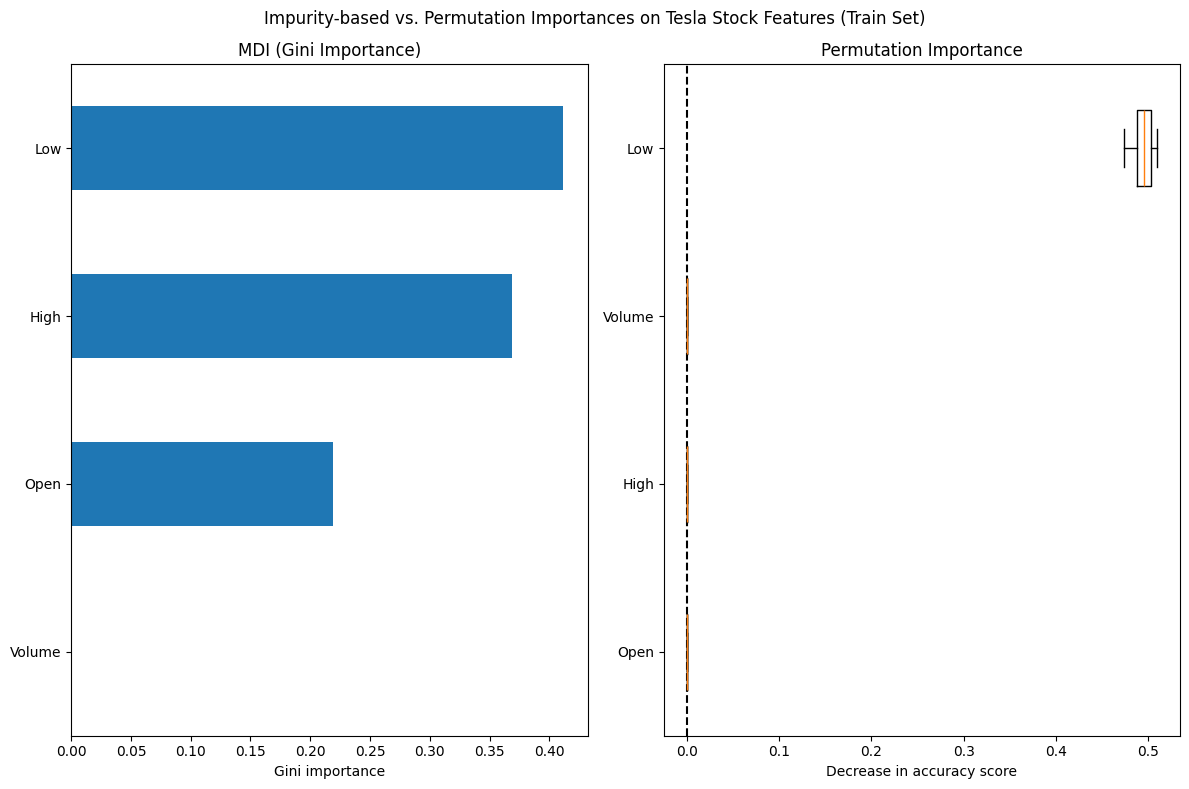

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Compute Mean Decrease Impurity (MDI) importance
mdi_importances = pd.Series(clf.feature_importances_, index=X_train.columns)
tree_importance_sorted_idx = np.argsort(clf.feature_importances_)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

mdi_importances.sort_values().plot.barh(ax=ax1)
ax1.set_xlabel("Gini importance")
ax1.set_title("MDI (Gini Importance)")

plot_permutation_importance(clf, X_train, y_train, ax2)
ax2.set_xlabel("Decrease in accuracy score")
ax2.set_title("Permutation Importance")

fig.suptitle(
    "Impurity-based vs. Permutation Importances on Tesla Stock Features (Train Set)"
)
fig.tight_layout()
plt.show()


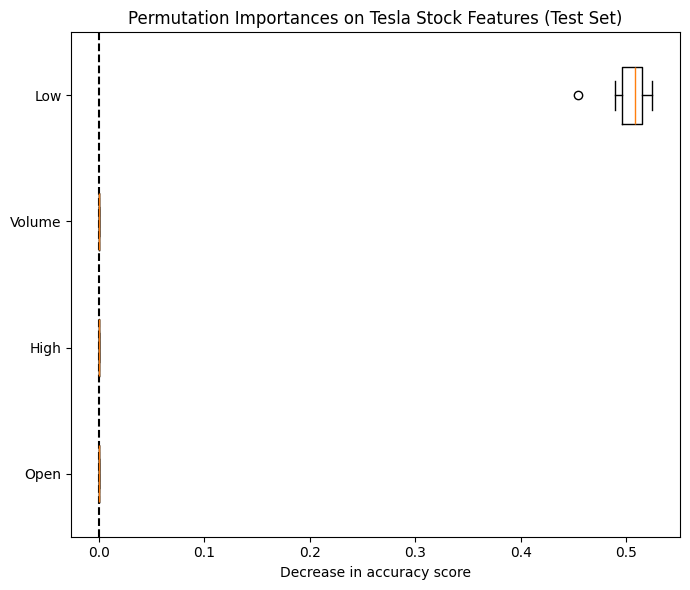

In [ ]:
fig, ax = plt.subplots(figsize=(7, 6))
plot_permutation_importance(clf, X_test, y_test, ax)
ax.set_title("Permutation Importances on Tesla Stock Features (Test Set)")
ax.set_xlabel("Decrease in accuracy score")
fig.tight_layout()
plt.show()


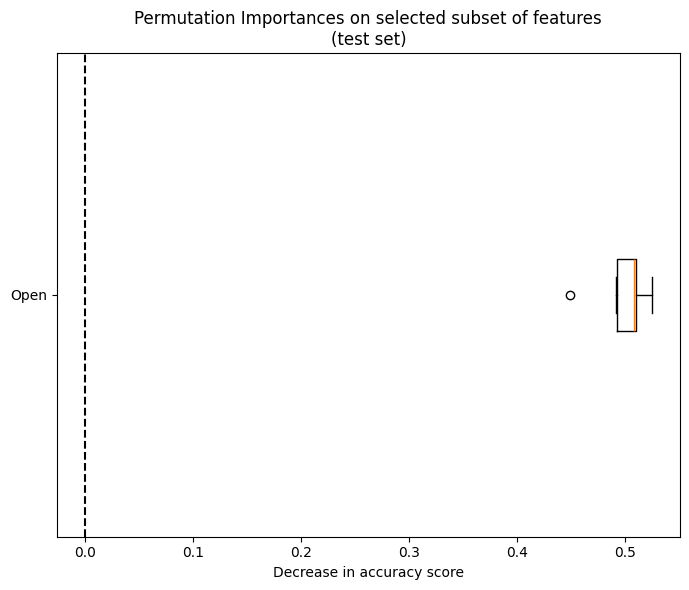

In [ ]:
fig, ax = plt.subplots(figsize=(7, 6))
plot_permutation_importance(clf_sel, X_test_sel, y_test, ax)
ax.set_title("Permutation Importances on selected subset of features\n(test set)")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()
plt.show()


RFE

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error

X = df.drop(columns=['Date', 'Close'])
y = df['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

selector = RFE(model, n_features_to_select=3)
selector = selector.fit(X_train, y_train)

selected_features = X.columns[selector.support_]
print("Selected Features:", selected_features)

X_train_sel = X_train[selected_features]
X_test_sel = X_test[selected_features]
model.fit(X_train_sel, y_train)

y_pred = model.predict(X_test_sel)

mse = mean_squared_error(y_test, y_pred)
print(f"Model Mean Squared Error with Selected Features: {mse:.2f}")


Selected Features: Index(['Open', 'High', 'Adj Close'], dtype='object')
Model Mean Squared Error with Selected Features: 0.00


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

df['Date'] = pd.to_datetime(df['Date'])
X = df.drop(columns=['Date', 'Adj Close'])
y = df['Adj Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

model = LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=3)
rfe.fit(X_train, y_train)
print("Selected features:", X_train.columns[rfe.support_])
print("Feature ranking:", rfe.ranking_)


Selected features: Index(['Open', 'High', 'Close'], dtype='object')
Feature ranking: [1 1 2 1 3]


In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import KFold

rfecv = RFECV(
    estimator=model,
    step=1,
    cv=KFold(5),
    scoring="r2",
    min_features_to_select=1
)
rfecv.fit(X_train, y_train)
print(f"Optimal number of features: {rfecv.n_features_}")
print("Selected features:", X_train.columns[rfecv.support_])
print("Feature ranking:", rfecv.ranking_)


Optimal number of features: 1
Selected features: Index(['Close'], dtype='object')
Feature ranking: [3 2 4 1 5]


umap

In [ ]:
df['Open_Close_Spread'] = df['Close'] - df['Open']
df['High_Low_Spread'] = df['High'] - df['Low']

In [ ]:
# Convert the 'date' column to datetime if it's not already in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Create a quarter-end flag (1 for quarter-end, 0 otherwise)
df['Quarter_End_Flag'] = df['Date'].dt.month.isin([3, 6, 9, 12]) & (df['Date'].dt.is_month_end)


In [ ]:
df['Quarter_End_Flag'] = df['Quarter_End_Flag'].astype(int)


In [ ]:
df['Trend'] = ['Uptrend' if df['Close'].iloc[i] > df['Close'].iloc[i - 1] else 'Downtrend'
               for i in range(len(df))]
df['Trend'].iloc[0] = 'Neutral'
df['Trend_Label'] = df['Trend'].map({'Uptrend': 1, 'Downtrend': 0, 'Neutral': 0})
df.tail()

<ipython-input-58-f40b38e517d4>:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Trend'].iloc[0] = 'Neutral'
<ipython-input-58-f40b38e517d4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

,Date,Open,High,Low,Close,Volume,Adj Close,Target,target,Open_Close_Spread,High_Low_Spread,Quarter_End_Flag,Trend,Trend_Label
1687,2017-03-13,244.820007,246.850006,242.779999,246.169998,3010700,246.169998,1,1,1.349991,4.070007,0,Uptrend,1
1688,2017-03-14,246.110001,258.119995,246.020004,258.000000,7575500,258.000000,1,1,11.889999,12.099991,0,Uptrend,1
1689,2017-03-15,257.000000,261.000000,254.270004,255.729996,4816600,255.729996,1,0,-1.270004,6.729996,0,Downtrend,0
1690,2017-03-16,262.399994,265.750000,259.059998,262.049988,7100400,262.049988,1,1,-0.350006,6.690002,0,Uptrend,1
1691,2017-03-17,264.000000,265.329987,261.200012,261.500000,6475900,261.500000,1,0,-2.500000,4.129975,0,Downtrend,0


In [ ]:
pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 6.8 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


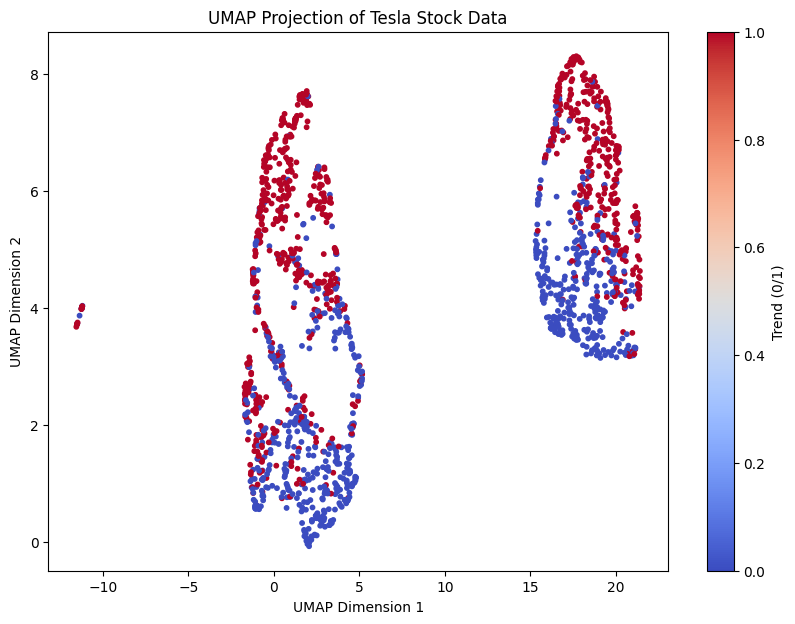

In [ ]:
import pandas as pd
import umap
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


# Select relevant features
features = ['Open', 'High', 'Low', 'Close', 'Volume','Open_Close_Spread','High_Low_Spread','Quarter_End_Flag']

# Drop rows with missing values (if any)
df = df.dropna(subset=features)

# Normalize the features using StandardScaler
scaler = StandardScaler()
normalized_features = scaler.fit_transform(df[features])

# Initialize UMAP
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)

# Apply UMAP to reduce the dimensionality
umap_embedding = umap_model.fit_transform(normalized_features)

# Add UMAP results back to the DataFrame for easier visualization
df['umap_x'] = umap_embedding[:, 0]
df['umap_y'] = umap_embedding[:, 1]

# Visualize the 2D embedding
plt.figure(figsize=(10, 7))
scatter = plt.scatter(df['umap_x'], df['umap_y'], c=df['Trend_Label'], cmap='coolwarm', s=10)
plt.colorbar(scatter, label='Trend (0/1)')
plt.title("UMAP Projection of Tesla Stock Data")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.show()


In [ ]:
df

,Date,Open,High,Low,Close,Volume,Adj Close,Target,target,Open_Close_Spread,High_Low_Spread,Quarter_End_Flag,Trend,Trend_Label,umap_x,umap_y
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,18766300,23.889999,0,0,4.889999,7.459999,0,Neutral,0,3.270036,5.938361
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,17187100,23.830000,0,0,-1.960001,7.120001,1,Downtrend,0,-11.370622,3.870991
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,8218800,21.959999,0,0,-3.040001,5.650000,0,Downtrend,0,15.492372,5.959356
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,5139800,19.200001,0,0,-3.799999,4.390001,0,Downtrend,0,15.433696,5.765756
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,6866900,16.110001,0,0,-3.889999,4.170000,0,Downtrend,0,15.438427,5.855673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687,2017-03-13,244.820007,246.850006,242.779999,246.169998,3010700,246.169998,1,1,1.349991,4.070007,0,Uptrend,1,-1.018260,4.011396
1688,2017-03-14,246.110001,258.119995,246.020004,258.000000,7575500,258.000000,1,1,11.889999,12.099991,0,Uptrend,1,1.520132,7.641853
1689,2017-03-15,257.000000,261.000000,254.270004,255.729996,4816600,255.729996,1,0,-1.270004,6.729996,0,Downtrend,0,1.227369,2.475093
1690,2017-03-16,262.399994,265.750000,259.059998,262.049988,7100400,262.049988,1,1,-0.350006,6.690002,0,Uptrend,1,1.690049,2.460328


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Select features and target
features = ['umap_x', 'umap_y']
target = 'Trend_Label'  # Assuming 'trend' is the binary target variable (0 or 1)

X = df[features]
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalize features for Logistic Regression and SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_lr = log_reg.predict(X_test_scaled)
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_lr))
print("ROC-AUC Score:", roc_auc_score(y_test, log_reg.predict_proba(X_test_scaled)[:, 1]))

# SVM
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)
print("\nSVM Performance:")
print(classification_report(y_test, y_pred_svm))
print("ROC-AUC Score:", roc_auc_score(y_test, svm_model.predict_proba(X_test_scaled)[:, 1]))

# XGBoost
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print("\nXGBoost Performance:")
print(classification_report(y_test, y_pred_xgb))
print("ROC-AUC Score:", roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1]))


Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.76      0.81      0.78       165
           1       0.80      0.76      0.78       174

    accuracy                           0.78       339
   macro avg       0.78      0.78      0.78       339
weighted avg       0.78      0.78      0.78       339

ROC-AUC Score: 0.8649599442702891

SVM Performance:
              precision    recall  f1-score   support

           0       0.75      0.82      0.78       165
           1       0.81      0.75      0.78       174

    accuracy                           0.78       339
   macro avg       0.78      0.78      0.78       339
weighted avg       0.78      0.78      0.78       339

ROC-AUC Score: 0.8632880529432254

XGBoost Performance:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       165
           1       0.81      0.83      0.82       174

    accuracy                           0.

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:21:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


**Hyperparameter Tuning**

elastic net

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
df['Open_Close_Spread'] = df['Close'] - df['Open']
df['High_Low_Spread'] = df['High'] - df['Low']


In [ ]:
# Convert the 'date' column to datetime if it's not already in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Create a quarter-end flag (1 for quarter-end, 0 otherwise)
df['Quarter_End_Flag'] = df['Date'].dt.month.isin([3, 6, 9, 12]) & (df['Date'].dt.is_month_end)


In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close,Open_Close_Spread,High_Low_Spread,Quarter_End_Flag
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,23.889999,4.889999,7.459999,False
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,23.830000,-1.960001,7.120001,True
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,21.959999,-3.040001,5.650000,False
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,19.200001,-3.799999,4.390001,False
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,16.110001,-3.889999,4.170000,False


In [ ]:
df['Quarter_End_Flag'] = df['Quarter_End_Flag'].astype(int)
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close,Open_Close_Spread,High_Low_Spread,Quarter_End_Flag
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,23.889999,4.889999,7.459999,0
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,23.830000,-1.960001,7.120001,1
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,21.959999,-3.040001,5.650000,0
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,19.200001,-3.799999,4.390001,0
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,16.110001,-3.889999,4.170000,0


In [ ]:
df['Trend'] = ['Uptrend' if df['Close'].iloc[i] > df['Close'].iloc[i - 1] else 'Downtrend'
               for i in range(len(df))]
df['Trend'].iloc[0] = 'Neutral'
df['Trend_Label'] = df['Trend'].map({'Uptrend': 1, 'Downtrend': 0, 'Neutral': 0})
df.tail()


<ipython-input-18-f40b38e517d4>:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Trend'].iloc[0] = 'Neutral'
<ipython-input-18-f40b38e517d4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

,Date,Open,High,Low,Close,Volume,Adj Close,Open_Close_Spread,High_Low_Spread,Quarter_End_Flag,Trend,Trend_Label
1687,2017-03-13,244.820007,246.850006,242.779999,246.169998,3010700,246.169998,1.349991,4.070007,0,Uptrend,1
1688,2017-03-14,246.110001,258.119995,246.020004,258.000000,7575500,258.000000,11.889999,12.099991,0,Uptrend,1
1689,2017-03-15,257.000000,261.000000,254.270004,255.729996,4816600,255.729996,-1.270004,6.729996,0,Downtrend,0
1690,2017-03-16,262.399994,265.750000,259.059998,262.049988,7100400,262.049988,-0.350006,6.690002,0,Uptrend,1
1691,2017-03-17,264.000000,265.329987,261.200012,261.500000,6475900,261.500000,-2.500000,4.129975,0,Downtrend,0


In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

In [ ]:
X = df[['Open', 'High', 'Low', 'Close', 'Volume','Open_Close_Spread','High_Low_Spread','Quarter_End_Flag']] # Exclude the target column
y = df['Trend_Label']  # Target: stock price trend (0 or 1)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close,Open_Close_Spread,High_Low_Spread,Quarter_End_Flag,Trend,Trend_Label
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,23.889999,4.889999,7.459999,0,Neutral,0
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,23.830000,-1.960001,7.120001,1,Downtrend,0
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,21.959999,-3.040001,5.650000,0,Downtrend,0
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,19.200001,-3.799999,4.390001,0,Downtrend,0
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,16.110001,-3.889999,4.170000,0,Downtrend,0


In [ ]:
# Create the ElasticNet model
elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5)  # You can tune alpha and l1_ratio

# Train the model
elastic_net.fit(X_train_scaled, y_train)

ElasticNet()

In [ ]:
# Make predictions
y_pred = elastic_net.predict(X_test_scaled)

# Since this is a binary classification problem, round predictions to get 0 or 1
y_pred_binary = [1 if pred >= 0.5 else 0 for pred in y_pred]

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_binary)
print("Confusion Matrix:")
print(cm)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_binary))

Accuracy: 0.47
Confusion Matrix:
[[  0 179]
 [  0 160]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       179
           1       0.47      1.00      0.64       160

    accuracy                           0.47       339
   macro avg       0.24      0.50      0.32       339
weighted avg       0.22      0.47      0.30       339



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for alpha and l1_ratio
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 5.0],
    'l1_ratio': [0.1, 0.5, 0.9]
}

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(ElasticNet(), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters found by GridSearchCV
print(f"Best Parameters: {grid_search.best_params_}")

# Use the best estimator
best_model = grid_search.best_estimator_


Best Parameters: {'alpha': 0.1, 'l1_ratio': 0.1}


In [ ]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.1)
# Train the model
elastic_net.fit(X_train_scaled, y_train)

ElasticNet(alpha=0.1, l1_ratio=0.1)

In [ ]:
# Make predictions
y_pred = elastic_net.predict(X_test_scaled)

# Since this is a binary classification problem, round predictions to get 0 or 1
y_pred_binary = [1 if pred >= 0.5 else 0 for pred in y_pred]

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_binary)
print("Confusion Matrix:")
print(cm)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_binary))

Accuracy: 0.79
Confusion Matrix:
[[126  53]
 [ 18 142]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.70      0.78       179
           1       0.73      0.89      0.80       160

    accuracy                           0.79       339
   macro avg       0.80      0.80      0.79       339
weighted avg       0.81      0.79      0.79       339



In [ ]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression with Elastic Net (L1 + L2 regularization)
log_reg = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5)  # l1_ratio controls the mix of L1 and L2
log_reg.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = log_reg.predict(X_test_scaled)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.831858407079646


In [ ]:
feature_importance = np.abs(log_reg.coef_[0])

# Create a DataFrame for better visualization
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

             Feature  Importance
5  Open_Close_Spread    2.751975
4             Volume    0.185056
7   Quarter_End_Flag    0.160197
6    High_Low_Spread    0.123983
3              Close    0.039168
0               Open    0.000000
1               High    0.000000
2                Low    0.000000


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:51:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


             Feature  Importance
5  Open_Close_Spread    0.474577
7   Quarter_End_Flag    0.126783
0               Open    0.076893
6    High_Low_Spread    0.073688
4             Volume    0.068976
1               High    0.066810
3              Close    0.059602
2                Low    0.052673


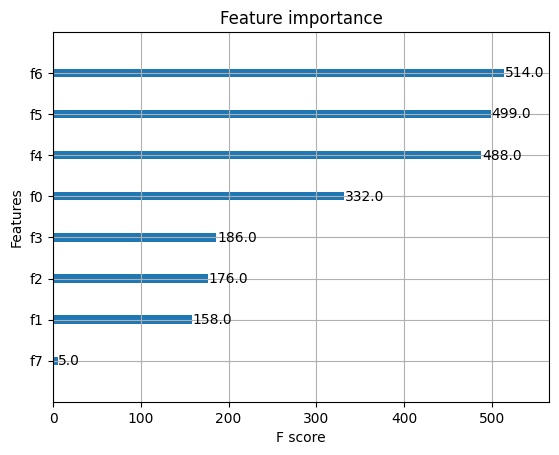

In [ ]:
import xgboost as xgb
import matplotlib.pyplot as plt

# Train the XGBoost model
xg_model = xgb.XGBClassifier(alpha=0.5, lambda_=1, use_label_encoder=False)
xg_model.fit(X_train_scaled, y_train)

# Get feature importance
importance = xg_model.feature_importances_

# Create a DataFrame for better visualization
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importance})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

# Optional: Plot the feature importance
xgb.plot_importance(xg_model)
plt.show()

In [ ]:
feature_names=['Open', 'High', 'Low', 'Close', 'Volume','Open_Close_Spread','High_Low_Spread','Quarter_End_Flag']

In [ ]:
from sklearn.inspection import permutation_importance

# Fit the model (example: logistic regression)
model = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, max_iter=1000)
model.fit(X_train_scaled, y_train)

# Permutation importance
perm_importance = permutation_importance(model, X_train_scaled, y_train, scoring='accuracy')

# Create DataFrame
perm_feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)

print(perm_feature_importance)

             Feature  Importance
5  Open_Close_Spread    0.338950
4             Volume    0.021434
6    High_Low_Spread    0.006208
3              Close    0.003843
7   Quarter_End_Flag    0.001922
0               Open    0.000000
1               High    0.000000
2                Low    0.000000


In [ ]:
from sklearn.svm import SVC
from sklearn.inspection import permutation_importance
import pandas as pd

# Fit the SVM model
svm_model = SVC(kernel='linear', C=1)  # Change kernel to 'rbf' or others if needed
svm_model.fit(X_train_scaled, y_train)

# Compute Permutation Importance
perm_importance_svm = permutation_importance(svm_model, X_train_scaled, y_train, scoring='accuracy')

# Create DataFrame
perm_feature_importance_svm = pd.DataFrame({
    'Feature': feature_names,
    'Importance': perm_importance_svm.importances_mean
}).sort_values(by='Importance', ascending=False)

print("Permutation Importance - SVM:")
print(perm_feature_importance_svm)


Permutation Importance - SVM:
             Feature  Importance
5  Open_Close_Spread    0.323134
3              Close    0.036955
4             Volume    0.034590
0               Open    0.015373
6    High_Low_Spread    0.012269
7   Quarter_End_Flag    0.003400
1               High   -0.007834
2                Low   -0.009165


In [ ]:
pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107721 sha256=5d1ba0392768e6a7a970bb11273ca777c4fc83f2d4721a75279331676bdf431f
  Stored in directory: /root/.cache/pip/wheels/ec/68/a9/de7d374ecb6f53462ce0eec8326fbab91b6228c82e67428d0d
Successfully built eli5


In [ ]:
X = df[['Open', 'High','Low','Close', 'Volume','Open_Close_Spread','High_Low_Spread','Quarter_End_Flag']] # Exclude the target column
y = df['Trend_Label']

train_size = int(0.8 * len(df))  #Splitting
train_data = df[:train_size]
test_data = df[train_size:]

In [ ]:
X = train_data[['Open', 'High','Low','Close', 'Volume','Open_Close_Spread','High_Low_Spread','Quarter_End_Flag']]
y = train_data['Trend_Label']

X_test = test_data[['Open', 'High','Low','Close', 'Volume','Open_Close_Spread','High_Low_Spread','Quarter_End_Flag']]
y_test = test_data['Trend_Label']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=2022)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from xgboost import plot_importance
import xgboost as xgb


# Define data_dmatrix
data_dmatrix = xgb.DMatrix(data=X, label=y)
# X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_valid, label=y_valid)

In [ ]:
# Define parameter grid for XGBoost
param = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'max_depth': 5,
    'learning_rate': 0.1,
    # 'n_estimators': 100,
    'subsample': 0.8,
    'colsample_bytree': 0.8
}

# Perform cross-validation using XGBoost's cv method
cv_results = xgb.cv(
    param,
    dtrain,
    num_boost_round=1000,
    nfold=3,
    metrics={'logloss'},
    early_stopping_rounds=10,
    seed=42
)

# Get the best number of boosting rounds
best_num_rounds = cv_results['test-logloss-mean'].idxmin()
print(f"\nBest Number of Boosting Rounds: {best_num_rounds}")

# Train the model using the best number of boosting rounds
model = xgb.train(
    param,
    dtrain,
    num_boost_round=best_num_rounds
)

# Make predictions on the validation set
y_pred_proba = model.predict(dvalid)
y_pred = (y_pred_proba > 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_valid, y_pred)
print(f"\nAccuracy (with XGBoost cv tuning): {accuracy:.2f}")


Best Number of Boosting Rounds: 29

Accuracy (with XGBoost cv tuning): 0.83


Bayesian optimization

In [ ]:
pip install bayesian-optimization

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from bayes_opt import BayesianOptimization

class XGBClassifierWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, **params):
        self.params = params
        self.model = xgb.XGBClassifier(**params, use_label_encoder=False, eval_metric="logloss")

    def fit(self, X, y):
        self.model.fit(X, y)
        return self

    def predict(self, X):
        return self.model.predict(X)

    def predict_proba(self, X):
        return self.model.predict_proba(X)

    def set_params(self, **params):
        self.params.update(params)
        self.model.set_params(**params)
        return self

    def get_params(self, deep=True):
        return self.params

def xgb_evaluate(n_estimators, learning_rate, max_depth, subsample, colsample_bytree):
    n_estimators = int(n_estimators)
    max_depth = int(max_depth)

    model = XGBClassifierWrapper(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        max_depth=max_depth,
        subsample=subsample,
        colsample_bytree=colsample_bytree
    )

    scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy", n_jobs=-1)
    return scores.mean()

param_bounds = {
    "n_estimators": (50, 200),
    "learning_rate": (0.01, 0.3),
    "max_depth": (3, 10),
    "subsample": (0.6, 1.0),
    "colsample_bytree": (0.6, 1.0)
}

optimizer = BayesianOptimization(
    f=xgb_evaluate,
    pbounds=param_bounds,
    random_state=42,
    verbose=2
)

optimizer.maximize(
    init_points=5,
    n_iter=25
)


|   iter    |  target   | colsam... | learni... | max_depth | n_esti... | subsample |
-------------------------------------------------------------------------------------
| 1         | 0.8215    | 0.7498    | 0.2857    | 8.124     | 139.8     | 0.6624    |
| 2         | 0.83      | 0.6624    | 0.02684   | 9.063     | 140.2     | 0.8832    |
| 3         | 0.8204    | 0.6082    | 0.2913    | 8.827     | 81.85     | 0.6727    |
| 4         | 0.8405    | 0.6734    | 0.09823   | 6.673     | 114.8     | 0.7165    |
| 5         | 0.8437    | 0.8447    | 0.05045   | 5.045     | 105.0     | 0.7824    |
| 6         | 0.8447    | 0.9367    | 0.07829   | 5.757     | 105.9     | 0.9595    |
| 7         | 0.8352    | 0.7168    | 0.0594    | 7.762     | 104.3     | 0.721     |
| 8         | 0.849     | 0.6092    | 0.153     | 3.812     | 107.0     | 0.9932    |
| 9         | 0.8363    | 0.8668    | 0.1399    | 4.711     | 110.0     | 0.9177    |
| 10        | 0.8479    | 0.6474    | 0.1528    | 3.06

In [ ]:
# Extract best parameters
best_params = optimizer.max["params"]
best_params["n_estimators"] = int(best_params["n_estimators"])  # Convert to int
best_params["max_depth"] = int(best_params["max_depth"])        # Convert to int

# Train the XGBClassifier with the best parameters
final_model = xgb.XGBClassifier(
    **best_params,
    use_label_encoder=False,
    eval_metric="logloss",
    random_state=42
)
final_model.fit(X_train, y_train)

# Evaluate on training and testing data
train_pred = final_model.predict(X_train)
test_pred = final_model.predict(X_test)

train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:59:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training Accuracy: 0.8860
Testing Accuracy: 0.8260


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from bayes_opt import BayesianOptimization

# Define the function for evaluating Logistic Regression
def logistic_regression_evaluate(C, max_iter):
    C = max(C, 1e-5)  # Ensure C is positive
    max_iter = int(max_iter)  # Convert to integer

    # Initialize the model
    model = LogisticRegression(
        penalty="l2",  # Using 'l2' penalty by default
        solver="lbfgs",
        C=C,
        max_iter=max_iter,
        random_state=42
    )

    # Perform 5-fold cross-validation and return the mean accuracy
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy", n_jobs=-1)
    return scores.mean()

# Define the parameter bounds for Bayesian Optimization
param_bounds = {
    "C": (1e-5, 100),  # Regularization strength
    "max_iter": (50, 1000)  # Maximum number of iterations
}

# Initialize the Bayesian Optimizer
optimizer = BayesianOptimization(
    f=logistic_regression_evaluate,
    pbounds=param_bounds,
    random_state=42,
    verbose=2
)

# Run the optimization
optimizer.maximize(
    init_points=5,  # Number of initial random evaluations
    n_iter=25       # Number of optimization steps
)

# Get the best parameters and score
best_params = optimizer.max
print("Best Parameters:", best_params)

# Apply the best parameters to the logistic regression model
best_C = best_params['params']['C']
best_max_iter = int(best_params['params']['max_iter'])

# Train the final model using the best parameters
final_model = LogisticRegression(
    penalty="l2",
    solver="lbfgs",
    C=best_C,
    max_iter=best_max_iter,
    random_state=42
)

# Fit the final model
final_model.fit(X_train, y_train)

# Evaluate the final model on the test set
test_accuracy = final_model.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")


|   iter    |  target   |     C     | max_iter  |
-------------------------------------------------
| 1         | 0.8458    | 37.45     | 953.2     |
| 2         | 0.8458    | 73.2      | 618.7     |
| 3         | 0.8458    | 15.6      | 198.2     |
| 4         | 0.8416    | 5.808     | 872.9     |
| 5         | 0.8458    | 60.11     | 722.7     |
| 6         | 0.8416    | 17.33     | 198.6     |
| 7         | 0.8427    | 59.79     | 722.7     |
| 8         | 0.8427    | 10.14     | 545.6     |
| 9         | 0.8437    | 0.5644    | 490.6     |
| 10        | 0.8458    | 66.75     | 660.1     |
| 11        | 0.8416    | 3.247     | 254.5     |
| 12        | 0.8458    | 44.18     | 833.2     |
| 13        | 0.8448    | 1.862     | 466.4     |
| 14        | 0.8458    | 39.51     | 513.0     |
| 15        | 0.8458    | 69.02     | 166.3     |
| 16        | 0.8416    | 60.41     | 194.1     |
| 17        | 0.8416    | 79.28     | 889.7     |
| 18        | 0.849     | 41.94     | 207.2     |


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from bayes_opt import BayesianOptimization

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the function for evaluating SVM
def svm_evaluate(C, gamma):
    C = max(C, 1e-5)  # Ensure C is positive
    gamma = max(gamma, 1e-5)  # Ensure gamma is positive

    # Initialize the SVM model
    model = SVC(C=C, gamma=gamma, random_state=42)

    # Perform 5-fold cross-validation and return the mean accuracy
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring="accuracy", n_jobs=-1)
    return scores.mean()

# Define the parameter bounds for Bayesian Optimization
param_bounds = {
    "C": (1e-5, 100),  # Regularization parameter
    "gamma": (1e-5, 1)  # Kernel coefficient
}

# Initialize the Bayesian Optimizer
optimizer = BayesianOptimization(
    f=svm_evaluate,
    pbounds=param_bounds,
    random_state=42,
    verbose=2
)

# Run the optimization
optimizer.maximize(
    init_points=5,  # Number of initial random evaluations
    n_iter=25       # Number of optimization steps
)

# Get the best parameters and score
best_params = optimizer.max
print("Best Parameters:", best_params)

# Apply the best parameters to the SVM model
best_C = best_params['params']['C']
best_gamma = best_params['params']['gamma']

# Train the final model using the best parameters
final_model = SVC(C=best_C, gamma=best_gamma, random_state=42)

# Fit the final model
final_model.fit(X_train_scaled, y_train)

# Evaluate the final model on the test set
test_accuracy = final_model.score(X_test_scaled, y_test)
print(f"Test Accuracy: {test_accuracy}")


|   iter    |  target   |     C     |   gamma   |
-------------------------------------------------
| 1         | 0.8047    | 37.45     | 0.9507    |
| 2         | 0.8152    | 73.2      | 0.5987    |
| 3         | 0.8426    | 15.6      | 0.156     |
| 4         | 0.8268    | 5.808     | 0.8662    |
| 5         | 0.8099    | 60.11     | 0.7081    |
| 6         | 0.812     | 21.79     | 0.988     |
| 7         | 0.8321    | 15.58     | 0.2106    |
| 8         | 0.8278    | 10.14     | 0.5217    |
| 9         | 0.8416    | 15.69     | 0.1411    |
| 10        | 0.8479    | 15.54     | 0.04394   |
| 11        | 0.8437    | 15.25     | 0.07746   |
| 12        | 0.8089    | 44.18     | 0.8244    |
| 13        | 0.8458    | 15.03     | 0.1187    |
| 14        | 0.831     | 15.13     | 0.3573    |
| 15        | 0.8479    | 14.78     | 0.07066   |
| 16        | 0.8321    | 60.41     | 0.1517    |
| 17        | 0.8321    | 14.63     | 0.3022    |
| 18        | 0.8458    | 14.48     | 0.07103   |


OPTUNA

## **Logistic Regression with Optuna**

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
!pip install optuna #installing the module
import optuna #importing the module
from hyperopt import fmin, tpe, hp, Trials

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 2.1 MB/s eta 0:00:00


In [ ]:
#Logistic Regression with Optuna
# Load dataset
df = pd.read_csv('/content/tesla.csv')

# Instead of using the last column directly, create a binary target
# based on whether the 'Close' price is above or below the mean.
df['Target'] = (df['Close'] > df['Close'].mean()).astype(int)  # 1 if above mean, 0 otherwise

# Drop 'Date' column and original 'Close' from features
X = df.drop(columns=['Date', 'Close', 'Target'])  # Features
y = df['Target']   # Target (binary classification)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optuna optimization (unchanged)
def objective(trial):
    # Suggest hyperparameters
    C = trial.suggest_loguniform('C', 1e-4, 10)
    solver = trial.suggest_categorical('solver', ['liblinear', 'saga'])

    # Train model
    model = LogisticRegression(C=C, solver=solver, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)

    # Evaluate model
    preds = model.predict(X_test)
    accuracy = accuracy_score(y_test, preds)
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Best parameters and accuracy
print("-----------------------------------------------------------------------------------------------------------------------------")
print("Best hyperparameters:", study.best_params)
print("Best accuracy:", study.best_value)


[I 2025-01-16 11:07:09,031] A new study created in memory with name: no-name-a52f3c24-45ea-42f0-9301-cd9d090f86e1
<ipython-input-47-a8b9f6c9a30b>:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-4, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[I 2025-01-16 11:07:10,056] Trial 0 finished with value: 0.48672566371681414 and parameters: {'C': 0.02963945225371445, 'solver': 'saga'}. Best is trial 0 with value: 0.48672566371681414.
<ipython-input-47-a8b9f6c9a30b>:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) inst

-----------------------------------------------------------------------------------------------------------------------------
Best hyperparameters: {'C': 0.02963945225371445, 'solver': 'saga'}
Best accuracy: 0.48672566371681414


linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import optuna

def objective(trial):
    # No hyperparameters for Linear Regression in sklearn, use feature selection example
    fit_intercept = trial.suggest_categorical('fit_intercept', [True, False])

    model = LinearRegression(fit_intercept=fit_intercept)
    model.fit(X_train, y_train)

    preds = model.predict(X_test)
    mse = mean_squared_error(y_test, preds)
    return mse

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=30)

print("-------------------------------------------------------------------------------------------")
print("Best hyperparameters:", study.best_params)
print("Best MSE:", study.best_value)


[I 2025-01-16 11:07:48,299] A new study created in memory with name: no-name-8327d65f-a70f-4f86-bc95-da1a7d0e1e79
[I 2025-01-16 11:07:48,317] Trial 0 finished with value: 0.026032697631930654 and parameters: {'fit_intercept': False}. Best is trial 0 with value: 0.026032697631930654.
[I 2025-01-16 11:07:48,325] Trial 1 finished with value: 0.019417756900317776 and parameters: {'fit_intercept': True}. Best is trial 1 with value: 0.019417756900317776.
[I 2025-01-16 11:07:48,344] Trial 2 finished with value: 0.019417756900317776 and parameters: {'fit_intercept': True}. Best is trial 1 with value: 0.019417756900317776.
[I 2025-01-16 11:07:48,361] Trial 3 finished with value: 0.026032697631930654 and parameters: {'fit_intercept': False}. Best is trial 1 with value: 0.019417756900317776.
[I 2025-01-16 11:07:48,370] Trial 4 finished with value: 0.019417756900317776 and parameters: {'fit_intercept': True}. Best is trial 1 with value: 0.019417756900317776.
[I 2025-01-16 11:07:48,403] Trial 5 fin

-------------------------------------------------------------------------------------------
Best hyperparameters: {'fit_intercept': True}
Best MSE: 0.019417756900317776


svm

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import optuna
import numpy as np

# Sample only 10% of the data for faster execution
X_train_sample, _, y_train_sample, _ = train_test_split(X_train, y_train, test_size=0.9, random_state=42)

# Split the sample into training and validation sets
X_train_small, X_val_small, y_train_small, y_val_small = train_test_split(
    X_train_sample, y_train_sample, test_size=0.2, random_state=42
)

def objective(trial):
    C = trial.suggest_float('C', 1.0, 3.0, log=True)  # Extremely narrow range for faster convergence
    kernel = trial.suggest_categorical('kernel', ['linear'])  # Fixed to linear for simplicity

    # Train on the smaller subset
    model = SVC(C=C, kernel=kernel, random_state=42, max_iter=100)  # Limiting iterations
    model.fit(X_train_small, y_train_small)

    preds = model.predict(X_val_small)
    accuracy = accuracy_score(y_val_small, preds)

    # Display progress for each trial
    print(f"Trial {trial.number}: Accuracy = {accuracy}, C = {C}, Kernel = {kernel}")
    return accuracy

# Run the optimization with fewer trials
study = optuna.create_study(direction='maximize', pruner=optuna.pruners.NopPruner())
study.optimize(objective, n_trials=5, timeout=120)  # Drastically fewer trials and shorter timeout

print("-------------------------------------------------------------------------------------------")
print("Best hyperparameters:", study.best_params)
print("Best accuracy:", study.best_value)


[I 2025-01-16 11:08:12,338] A new study created in memory with name: no-name-7738b35d-99c6-4165-9c57-374a2fff9f2e
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:304: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
[I 2025-01-16 11:08:12,365] Trial 0 finished with value: 0.48148148148148145 and parameters: {'C': 2.7900931314491113, 'kernel': 'linear'}. Best is trial 0 with value: 0.48148148148148145.
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:304: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
[I 2025-01-16 11:08:12,386] Trial 1 finished with value: 0.48148148148148145 and parameters: {'C': 1.2144994223924717, 'kernel': 'linear'}. Best is trial 0 with value: 0.48148148148148145.
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:304: ConvergenceW

Trial 0: Accuracy = 0.48148148148148145, C = 2.7900931314491113, Kernel = linear
Trial 1: Accuracy = 0.48148148148148145, C = 1.2144994223924717, Kernel = linear
Trial 2: Accuracy = 0.48148148148148145, C = 1.9166764902369653, Kernel = linear
Trial 3: Accuracy = 0.48148148148148145, C = 1.6679762377575051, Kernel = linear
Trial 4: Accuracy = 0.48148148148148145, C = 2.964821546291741, Kernel = linear
-------------------------------------------------------------------------------------------
Best hyperparameters: {'C': 2.7900931314491113, 'kernel': 'linear'}
Best accuracy: 0.48148148148148145


random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 300)
    max_depth = trial.suggest_int('max_depth', 2, 20)

    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    model.fit(X_train, y_train)

    preds = model.predict(X_test)
    accuracy = accuracy_score(y_test, preds)
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

print("Best hyperparameters:", study.best_params)
print("Best accuracy:", study.best_value)


[I 2025-01-16 11:08:42,621] A new study created in memory with name: no-name-5c6e69d3-4b53-48d4-a68b-f477227df2d5
[I 2025-01-16 11:08:43,466] Trial 0 finished with value: 1.0 and parameters: {'n_estimators': 270, 'max_depth': 20}. Best is trial 0 with value: 1.0.
[I 2025-01-16 11:08:43,758] Trial 1 finished with value: 1.0 and parameters: {'n_estimators': 92, 'max_depth': 17}. Best is trial 0 with value: 1.0.
[I 2025-01-16 11:08:44,220] Trial 2 finished with value: 1.0 and parameters: {'n_estimators': 135, 'max_depth': 4}. Best is trial 0 with value: 1.0.
[I 2025-01-16 11:08:44,987] Trial 3 finished with value: 1.0 and parameters: {'n_estimators': 248, 'max_depth': 4}. Best is trial 0 with value: 1.0.
[I 2025-01-16 11:08:45,299] Trial 4 finished with value: 1.0 and parameters: {'n_estimators': 108, 'max_depth': 17}. Best is trial 0 with value: 1.0.
[I 2025-01-16 11:08:45,480] Trial 5 finished with value: 1.0 and parameters: {'n_estimators': 61, 'max_depth': 7}. Best is trial 0 with val

Best hyperparameters: {'n_estimators': 270, 'max_depth': 20}
Best accuracy: 1.0


hyperopt

logistic regression

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
from sklearn.preprocessing import StandardScaler

# Convert 'Date' to datetime for preprocessing (optional)
df['Date'] = pd.to_datetime(df['Date'])

# Create a binary target column based on whether 'Close' increased from the previous day
df['target'] = (df['Close'].diff() > 0).astype(int)

# Drop rows with NaN values resulting from diff()
df = df.dropna()

# Features and target
X = df.drop(columns=['Date', 'Close', 'target'])
y = df['target']

# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the objective function for hyperparameter optimization
def objective(params):
    model = LogisticRegression(**params)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    accuracy = accuracy_score(y_test, preds)
    return {'loss': -accuracy, 'status': STATUS_OK}

# Define the search space for hyperparameters
space = {
    'C': hp.loguniform('C', -4, 2),
    'solver': hp.choice('solver', ['liblinear', 'saga']),
    'max_iter': hp.choice('max_iter', [100, 200, 300]),
}

# Run hyperopt to optimize hyperparameters
trials = Trials()
best_params = fmin(objective, space, algo=tpe.suggest, max_evals=50, trials=trials)

print("Best Hyperparameters:", best_params)

# Refit the model with the best hyperparameters
best_params['solver'] = ['liblinear', 'saga'][best_params['solver']]
best_params['max_iter'] = [100, 200, 300][best_params['max_iter']]
model = LogisticRegression(**best_params)
model.fit(X_train, y_train)

# Evaluate the model
preds = model.predict(X_test)
accuracy = accuracy_score(y_test, preds)
print(f"Accuracy with Best Hyperparameters: {accuracy:.2f}")


 38%|███▊      | 19/50 [00:00<00:00, 39.95trial/s, best loss: -0.7227138643067846]

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 48%|████▊     | 24/50 [00:00<00:01, 21.18trial/s, best loss: -0.7610619469026548]

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 56%|█████▌    | 28/50 [00:01<00:01, 16.64trial/s, best loss: -0.7610619469026548]

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 70%|███████   | 35/50 [00:01<00:00, 18.83trial/s, best loss: -0.7610619469026548]

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 76%|███████▌  | 38/50 [00:01<00:00, 20.11trial/s, best loss: -0.7610619469026548]

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



100%|██████████| 50/50 [00:02<00:00, 24.97trial/s, best loss: -0.7610619469026548]
Best Hyperparameters: {'C': 7.0102040034204975, 'max_iter': 1, 'solver': 1}
Accuracy with Best Hyperparameters: 0.76


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Scale the features (if needed)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the objective function
def objective(params):
    fit_intercept = bool(params['fit_intercept'])  # Convert 0/1 to True/False
    model = LinearRegression(fit_intercept=fit_intercept)
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, preds)
    return {'loss': mse, 'status': STATUS_OK}

# Define the search space
space = {
    'fit_intercept': hp.choice('fit_intercept', [True, False]),  # Map True/False
}

# Run hyperopt
trials = Trials()
best_params = fmin(objective, space, algo=tpe.suggest, max_evals=50, trials=trials)

# Map the best parameters back to their actual values
best_params['fit_intercept'] = bool(best_params['fit_intercept'])
print("Best Hyperparameters:", best_params)

# Refit the model with the best parameters
model = LinearRegression(fit_intercept=best_params['fit_intercept'])
model.fit(X_train_scaled, y_train)

# Evaluate the model
preds = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, preds)
print(f"Mean Squared Error with Best Hyperparameters: {mse:.2f}")


100%|██████████| 50/50 [00:00<00:00, 392.29trial/s, best loss: 0.18489503110978747]
Best Hyperparameters: {'fit_intercept': False}
Mean Squared Error with Best Hyperparameters: 0.42


svm

In [ ]:
from sklearn.svm import SVC

# Define the objective function
def objective(params):
    model = SVC(**params)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    accuracy = accuracy_score(y_test, preds)
    return {'loss': -accuracy, 'status': STATUS_OK}

# Define the search space
space = {
    'C': hp.loguniform('C', -4, 2),
    'kernel': hp.choice('kernel', ['linear', 'rbf']),
    'gamma': hp.loguniform('gamma', -4, 2),
}

# Run hyperopt
trials = Trials()
best_params = fmin(objective, space, algo=tpe.suggest, max_evals=50, trials=trials)

print("Best Hyperparameters:", best_params)


100%|██████████| 50/50 [00:06<00:00,  7.51trial/s, best loss: -0.7492625368731564]
Best Hyperparameters: {'C': 6.872841693772251, 'gamma': 4.96060417719902, 'kernel': 1}


random foest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Define the objective function
def objective(params):
    model = RandomForestClassifier(**params)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    accuracy = accuracy_score(y_test, preds)
    return {'loss': -accuracy, 'status': STATUS_OK}

# Define the search space
space = {
    'n_estimators': hp.choice('n_estimators', range(50, 500)),
    'max_depth': hp.choice('max_depth', range(1, 20)),
    'min_samples_split': hp.uniform('min_samples_split', 0.01, 0.5),
    'min_samples_leaf': hp.uniform('min_samples_leaf', 0.01, 0.5),
}

# Run hyperopt
trials = Trials()
best_params = fmin(objective, space, algo=tpe.suggest, max_evals=50, trials=trials)

print("Best Hyperparameters:", best_params)


100%|██████████| 50/50 [00:57<00:00,  1.14s/trial, best loss: -0.6017699115044248]
Best Hyperparameters: {'max_depth': 15, 'min_samples_leaf': 0.010554008793274252, 'min_samples_split': 0.40213275985685565, 'n_estimators': 218}
